## <font color='Blue'> Telecom - Análise de Cancelamento.</font>

![](https://miro.medium.com/v2/resize:fit:1400/1*Xj5QTBN7umWESE_YrrDlhw.png)

In [11]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display

In [12]:
df = pd.read_excel("dClienteGeral_Editada.xlsx")
df.head(2)

,idCliente,idCidade,idFilial,nomeCliente,tipoCliente,tipoClienteFiscal,tipoAssinate,Sexo,Bairro,nomeCidade,tipoPessoa,Ativo,dataNascimento,Idade,dataCadastro
0,13697-Veloo,1699-Veloo,172-Veloo,UNIDAO TRANSPORTES E LOGISTICA LTDA,VAREJO,01 - Comercial,Residencial/Pessoa física,M,POLO CLOROQUIMICO,Marechal Deodoro,J,N,2014-08-08 00:00:00,10.0,2017-08-10 00:00:00
1,13701-Veloo,1735-Veloo,35-Veloo,IGN TELECOMUNICACOES DO BRASIL LTDA [EXCLUIR C...,ISP - INTERNET SERVICE PROVIDER,01 - Comercial,Comercial/Industrial,M,CENTRO,Santana do Mundaú,J,N,2008-10-29 00:00:00,16.0,2017-08-10 00:00:00


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114413 entries, 0 to 114412
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   idCliente          114413 non-null  object 
 1   idCidade           114396 non-null  object 
 2   idFilial           114396 non-null  object 
 3   nomeCliente        114394 non-null  object 
 4   tipoCliente        114392 non-null  object 
 5   tipoClienteFiscal  114394 non-null  object 
 6   tipoAssinate       114394 non-null  object 
 7   Sexo               77444 non-null   object 
 8   Bairro             114296 non-null  object 
 9   nomeCidade         114375 non-null  object 
 10  tipoPessoa         114375 non-null  object 
 11  Ativo              114375 non-null  object 
 12  dataNascimento     86120 non-null   object 
 13  Idade              86120 non-null   float64
 14  dataCadastro       114366 non-null  object 
dtypes: float64(1), object(14)
memory usage: 13.1+ MB


In [21]:
df['dataNascimento'] = pd.to_datetime(df['dataNascimento'], errors='coerce')
df['dataCadastro'] = pd.to_datetime(df['dataCadastro'], errors='coerce')

In [23]:
print(df.dtypes)

idCliente                    object
idCidade                     object
idFilial                     object
nomeCliente                  object
tipoCliente                  object
tipoClienteFiscal            object
tipoAssinate                 object
Sexo                         object
Bairro                       object
nomeCidade                   object
tipoPessoa                   object
Ativo                        object
dataNascimento       datetime64[ns]
Idade                       float64
dataCadastro         datetime64[ns]
dtype: object


## % Distribuição por Gênero / Clientes Ativos no Sistema

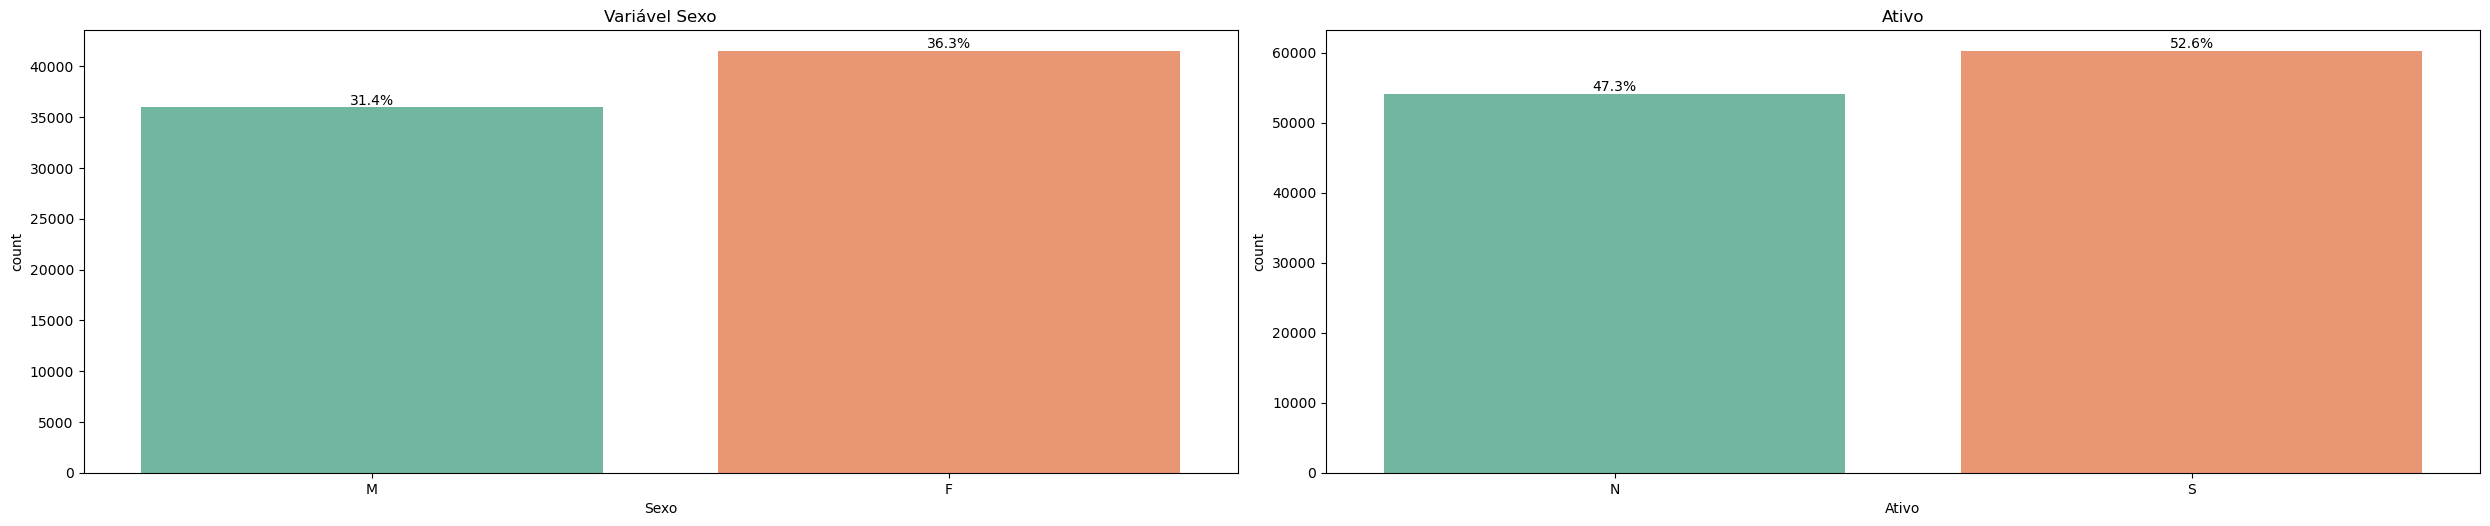

In [25]:
def add_percentage(ax, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.figure(figsize=(25, 45))

plt.subplot(9, 2, 1)
plt.gca().set_title('Variável Sexo')

ax1 = sns.countplot(x='Sexo', hue='Sexo', palette='Set2', data=df, legend=False)
add_percentage(ax1, len(df['Sexo']))

plt.subplot(9, 2, 2)
plt.gca().set_title('Ativo')

ax17 = sns.countplot(x='Ativo', hue='Ativo', palette='Set2', data=df, legend=False)
add_percentage(ax17, len(df['Ativo']))

plt.tight_layout()
plt.show()

## Criando a coluna faixa etária

In [28]:
# Função para calcular a faixa etária com base na idade
def calcular_faixa_etaria(Idade):  
    if pd.isna(Idade):
        return 'Idade inválida'

    if Idade < 18:
        return 'Menor de 18 anos'
    elif 18 <= Idade < 30:
        return '18 a 29 anos'
    elif 30 <= Idade < 60:
        return '30 a 59 anos'
    else:
        return '60 anos ou mais'

# Criando a coluna 'faixaEtaria' com base na coluna 'Idade'
df['faixaEtaria'] = df['Idade'].apply(calcular_faixa_etaria)

display(df.head())


,idCliente,idCidade,idFilial,nomeCliente,tipoCliente,tipoClienteFiscal,tipoAssinate,Sexo,Bairro,nomeCidade,tipoPessoa,Ativo,dataNascimento,Idade,dataCadastro,faixaEtaria
0,13697-Veloo,1699-Veloo,172-Veloo,UNIDAO TRANSPORTES E LOGISTICA LTDA,VAREJO,01 - Comercial,Residencial/Pessoa física,M,POLO CLOROQUIMICO,Marechal Deodoro,J,N,2014-08-08,10.0,2017-08-10,Menor de 18 anos
1,13701-Veloo,1735-Veloo,35-Veloo,IGN TELECOMUNICACOES DO BRASIL LTDA [EXCLUIR C...,ISP - INTERNET SERVICE PROVIDER,01 - Comercial,Comercial/Industrial,M,CENTRO,Santana do Mundaú,J,N,2008-10-29,16.0,2017-08-10,Menor de 18 anos
2,13744-Veloo,1695-Veloo,27-Veloo,MACEIO NET LTDA,ISP - INTERNET SERVICE PROVIDER,01 - Comercial,Comercial/Industrial,M,BENEDITO BENTES II,Maceió,J,N,NaT,NaN,2017-08-18,Idade inválida
3,13765-Veloo,1749-Veloo,35-Veloo,REVERTON DE LIMA BOMFIM 2º PONTO,VAREJO,03 - Residencial/Pessoa Física,Residencial/Pessoa física,M,ZONA RURAL,União dos Palmares,F,N,1984-05-19,40.0,2017-08-23,30 a 59 anos
4,13786-Veloo,1749-Veloo,35-Veloo,SHAYANNE LARISSA DIAS DOS SANTOS,VAREJO,03 - Residencial/Pessoa Física,Residencial/Pessoa física,F,USINA LAGINHA,União dos Palmares,F,N,1991-11-30,33.0,2017-08-29,30 a 59 anos


## Média Percentual da Faixa Etária por Sexo (M e F)

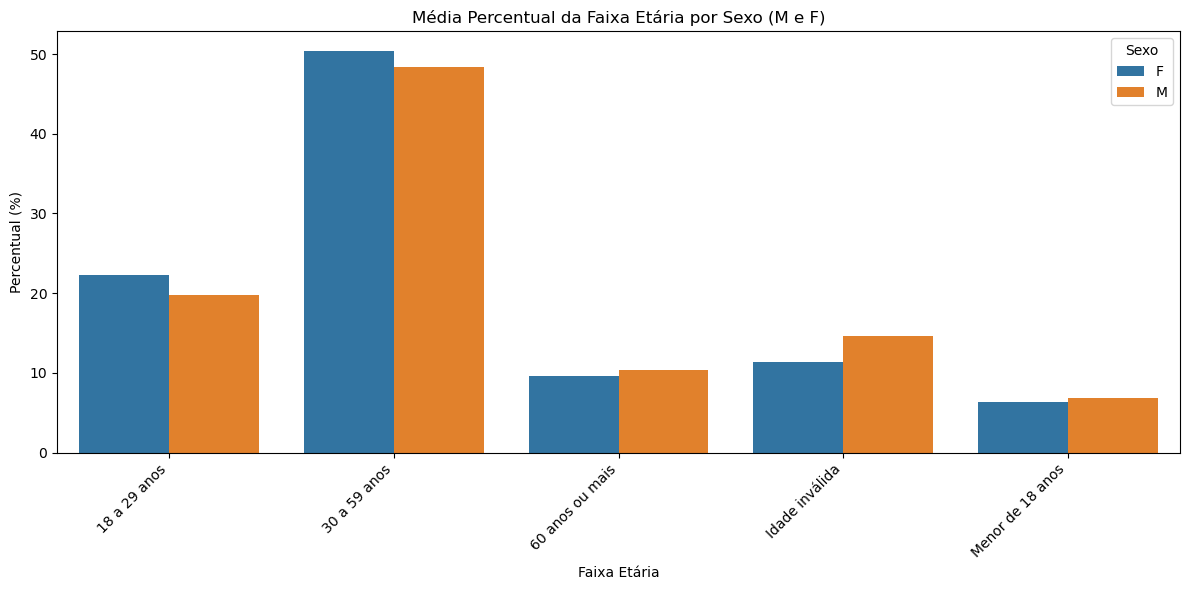

,faixaEtaria,Sexo,percentual
0,18 a 29 anos,F,22.306580
1,18 a 29 anos,M,19.803082
2,30 a 59 anos,F,50.337431
3,30 a 59 anos,M,48.347889
4,60 anos ou mais,F,9.568571
5,60 anos ou mais,M,10.307615
6,Idade inválida,F,11.378645
7,Idade inválida,M,14.640930
8,Menor de 18 anos,F,6.408773
9,Menor de 18 anos,M,6.900484


In [32]:
# Removendo linhas com valores ausentes em 'faixaEtaria' ou 'Sexo'
df_analise = df.dropna(subset=['faixaEtaria', 'Sexo'])

# Filtrando por sexo 'M' e 'F'
df_analise = df_analise[df_analise['Sexo'].isin(['M', 'F'])]

# Calculando a contagem de cada combinação de faixa etária e sexo
contagem = df_analise.groupby(['faixaEtaria', 'Sexo']).size().reset_index(name='contagem')

# Calculando a média percentual da faixa etária por sexo usando transform
contagem['percentual'] = contagem['contagem'] / contagem.groupby('Sexo')['contagem'].transform('sum') * 100

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='faixaEtaria', y='percentual', hue='Sexo', data=contagem)
plt.title('Média Percentual da Faixa Etária por Sexo (M e F)')
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exibindo a tabela com os resultados
display(contagem[['faixaEtaria', 'Sexo', 'percentual']])

## Percentual de clientes por gênero e região - Visão geral 

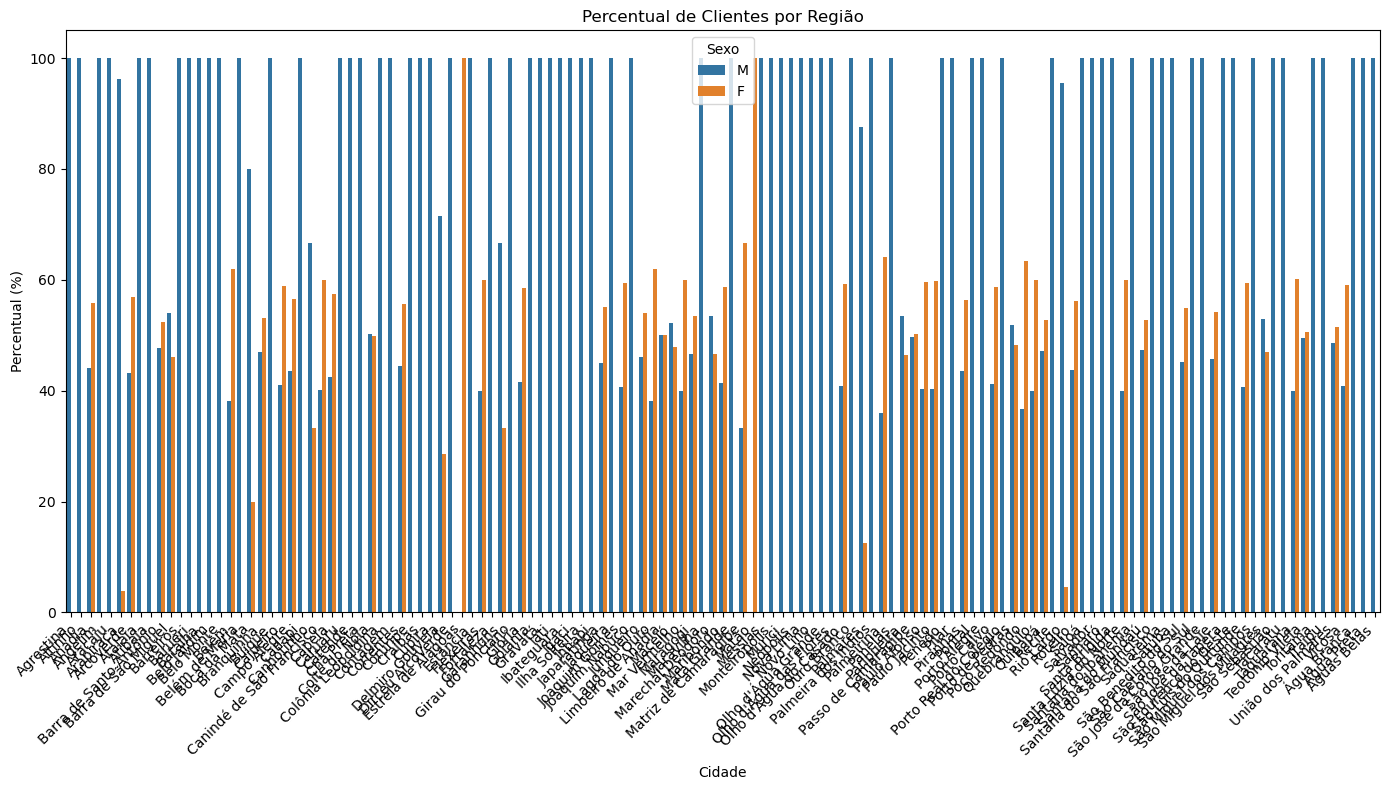

,nomeCidade,Sexo,percentual
0,Agrestina,M,100.000000
1,Altinho,M,100.000000
2,Anadia,F,55.870021
3,Anadia,M,44.129979
4,Angelim,M,100.000000
...,...,...,...
181,Viçosa,F,59.137826
182,Viçosa,M,40.862174
183,Água Branca,M,100.000000
184,Água Preta,M,100.000000


In [35]:
# Filtrando por sexo 'M' e 'F'
df_analise = df[df['Sexo'].isin(['M', 'F'])]

# Calculando o percentual de clientes por região e sexo
analise_percentual = df_analise.groupby(['nomeCidade', 'Sexo']).size().reset_index(name='contagem')
analise_percentual['percentual'] = analise_percentual.groupby('nomeCidade')['contagem'].transform(lambda x: 100 * x / x.sum())

# Criando o gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x='nomeCidade', y='percentual', hue='Sexo', data=analise_percentual)
plt.title('Percentual de Clientes por Região')
plt.xlabel('Cidade')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exibindo a tabela com os resultados
display(analise_percentual[['nomeCidade', 'Sexo', 'percentual']])

## Percentual de clientes por gênero e região - Visão geral (Top 10)

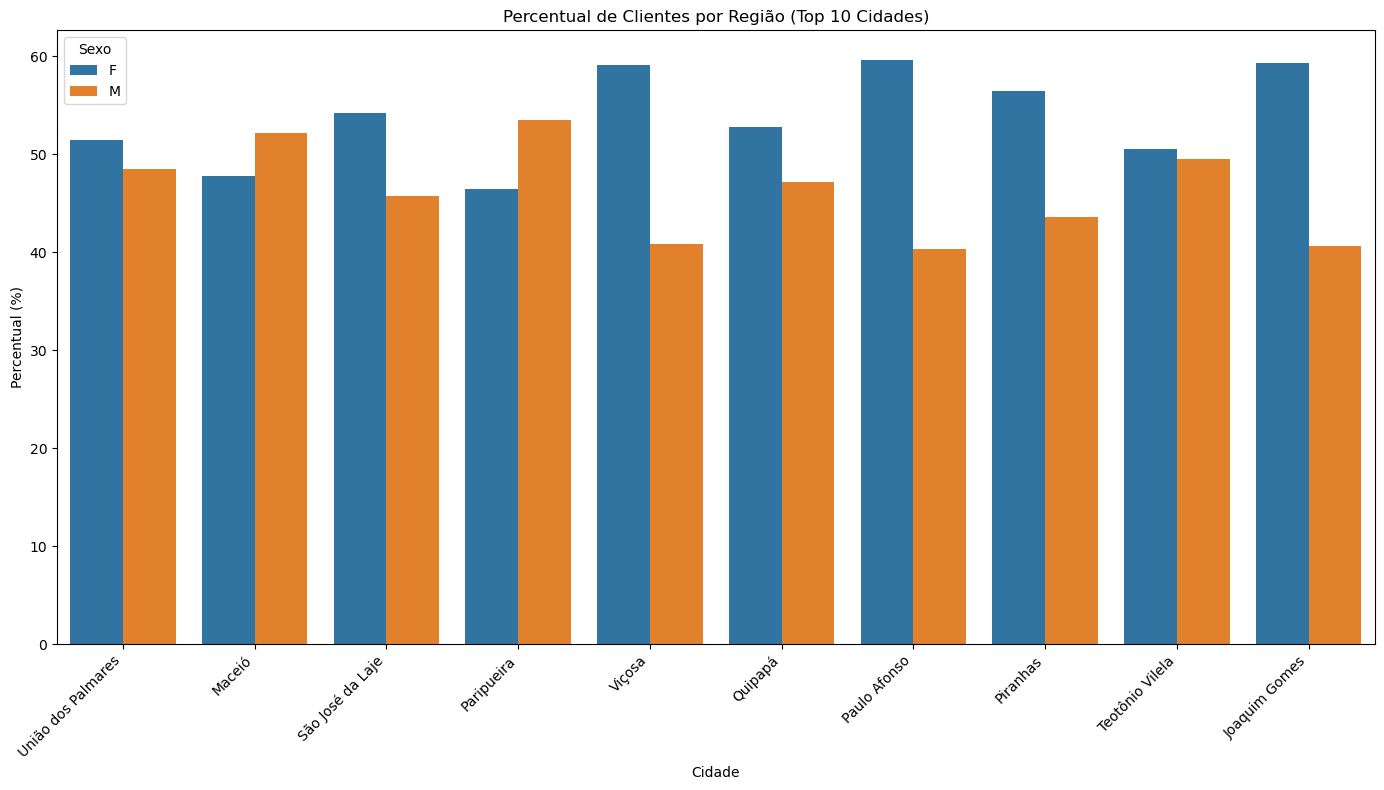

,nomeCidade,Sexo,percentual
0,Joaquim Gomes,F,59.355756
1,Joaquim Gomes,M,40.644244
2,Maceió,F,47.787262
3,Maceió,M,52.212738
4,Paripueira,F,46.496332
5,Paripueira,M,53.503668
6,Paulo Afonso,F,59.676751
7,Paulo Afonso,M,40.323249
8,Piranhas,F,56.430568
9,Piranhas,M,43.569432


In [41]:
# Filtrando apenas clientes com sexo 'M' e 'F'
df_analise = df[df['Sexo'].isin(['M', 'F'])]

# Contando o número de clientes por cidade
top_cidades = df_analise['nomeCidade'].value_counts().nlargest(10).index  # Top 10 cidades

# Filtrando o DataFrame para considerar apenas essas cidades
df_top_cidades = df_analise[df_analise['nomeCidade'].isin(top_cidades)]

# Calculando o percentual de clientes por cidade e sexo
analise_percentual = (
    df_top_cidades.groupby(['nomeCidade', 'Sexo'])
    .size()
    .reset_index(name='contagem')
)

analise_percentual['percentual'] = (
    analise_percentual.groupby('nomeCidade')['contagem']
    .transform(lambda x: 100 * x / x.sum())
)

# Ordenando as cidades pelo total de clientes para melhor visualização
analise_percentual['nomeCidade'] = pd.Categorical(
    analise_percentual['nomeCidade'], 
    categories=top_cidades, 
    ordered=True
)

# Criando o gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x='nomeCidade', y='percentual', hue='Sexo', data=analise_percentual)

# Configurações do gráfico
plt.title('Percentual de Clientes por Região (Top 10 Cidades)')
plt.xlabel('Cidade')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

# Exibindo a tabela com os resultados
display(analise_percentual[['nomeCidade', 'Sexo', 'percentual']])


## Percentual de clientes por gênero nas cidades: Barra de São Miguel / Marechal Deodoro

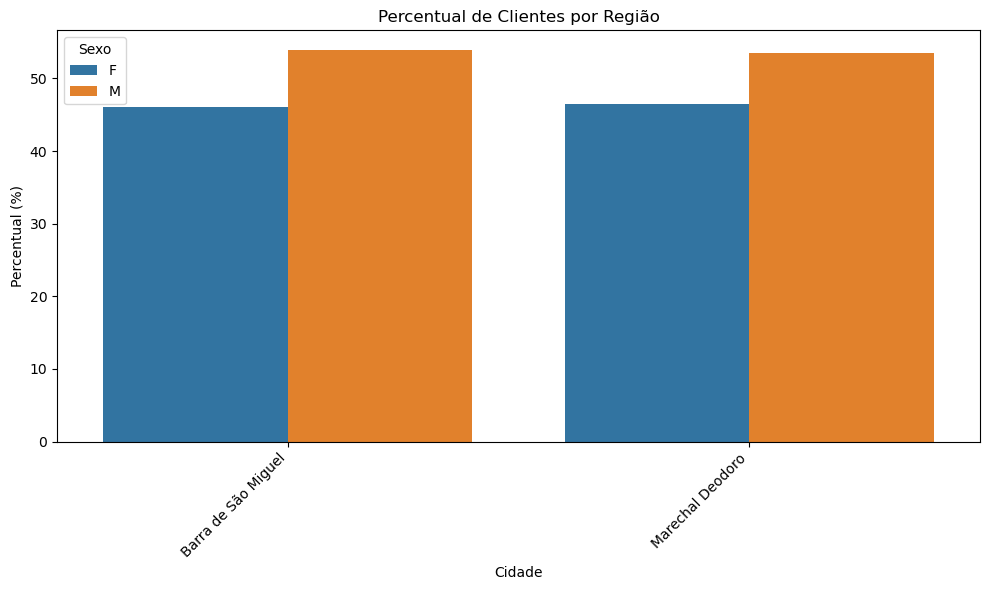

,nomeCidade,Sexo,percentual
0,Barra de São Miguel,F,46.068660
1,Barra de São Miguel,M,53.931340
2,Marechal Deodoro,F,46.530612
3,Marechal Deodoro,M,53.469388


In [38]:
# Filtrando por sexo 'M' e 'F'
df_analise = df[df['Sexo'].isin(['M', 'F'])]

# Filtrando apenas as cidades desejadas
cidades_desejadas = ["Marechal Deodoro", "Barra de São Miguel"]
df_analise = df_analise[df_analise['nomeCidade'].isin(cidades_desejadas)]

# Calculando o percentual de clientes por região e sexo
analise_percentual = df_analise.groupby(['nomeCidade', 'Sexo']).size().reset_index(name='contagem')
analise_percentual['percentual'] = analise_percentual.groupby('nomeCidade')['contagem'].transform(lambda x: 100 * x / x.sum())

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='nomeCidade', y='percentual', hue='Sexo', data=analise_percentual)
plt.title('Percentual de Clientes por Região')
plt.xlabel('Cidade')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exibindo a tabela com os resultados
display(analise_percentual[['nomeCidade', 'Sexo', 'percentual']])

## Percentual de cliente por Tipo de Pessoa / Jurídica, Física e Estrangeira - Geral

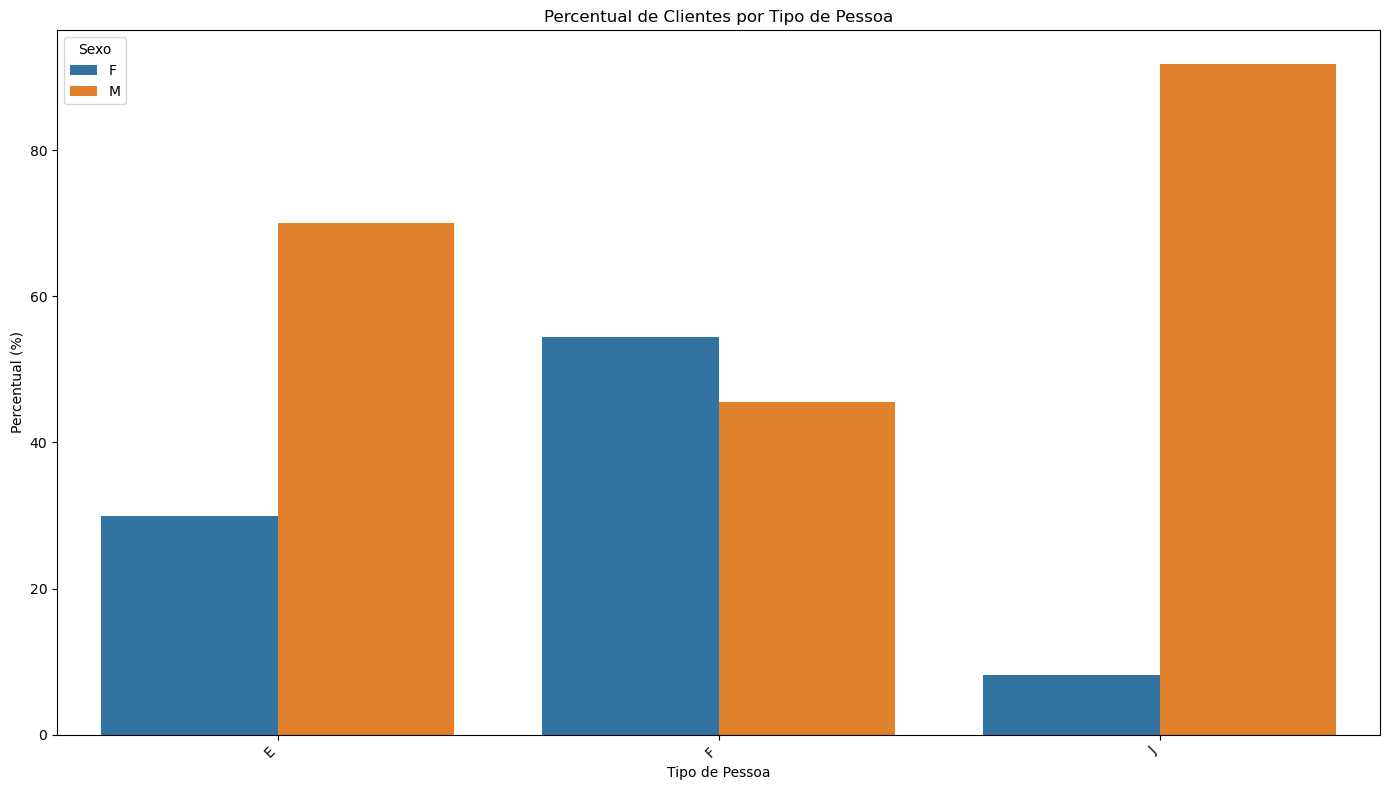

,tipoPessoa,Sexo,percentual
0,E,F,30.000000
1,E,M,70.000000
2,F,F,54.444796
3,F,M,45.555204
4,J,F,8.169014
5,J,M,91.830986


In [44]:
# Filtrando por sexo 'M' e 'F'
df_analise = df[df['Sexo'].isin(['M', 'F'])]

# Calculando o percentual de clientes por região e sexo
analise_percentual = df_analise.groupby(['tipoPessoa', 'Sexo']).size().reset_index(name='contagem')
analise_percentual['percentual'] = analise_percentual.groupby('tipoPessoa')['contagem'].transform(lambda x: 100 * x / x.sum())

# Criando o gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x='tipoPessoa', y='percentual', hue='Sexo', data=analise_percentual)
plt.title('Percentual de Clientes por Tipo de Pessoa')
plt.xlabel('Tipo de Pessoa')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exibindo a tabela com os resultados
display(analise_percentual[['tipoPessoa', 'Sexo', 'percentual']])

## Barra de São Miguel

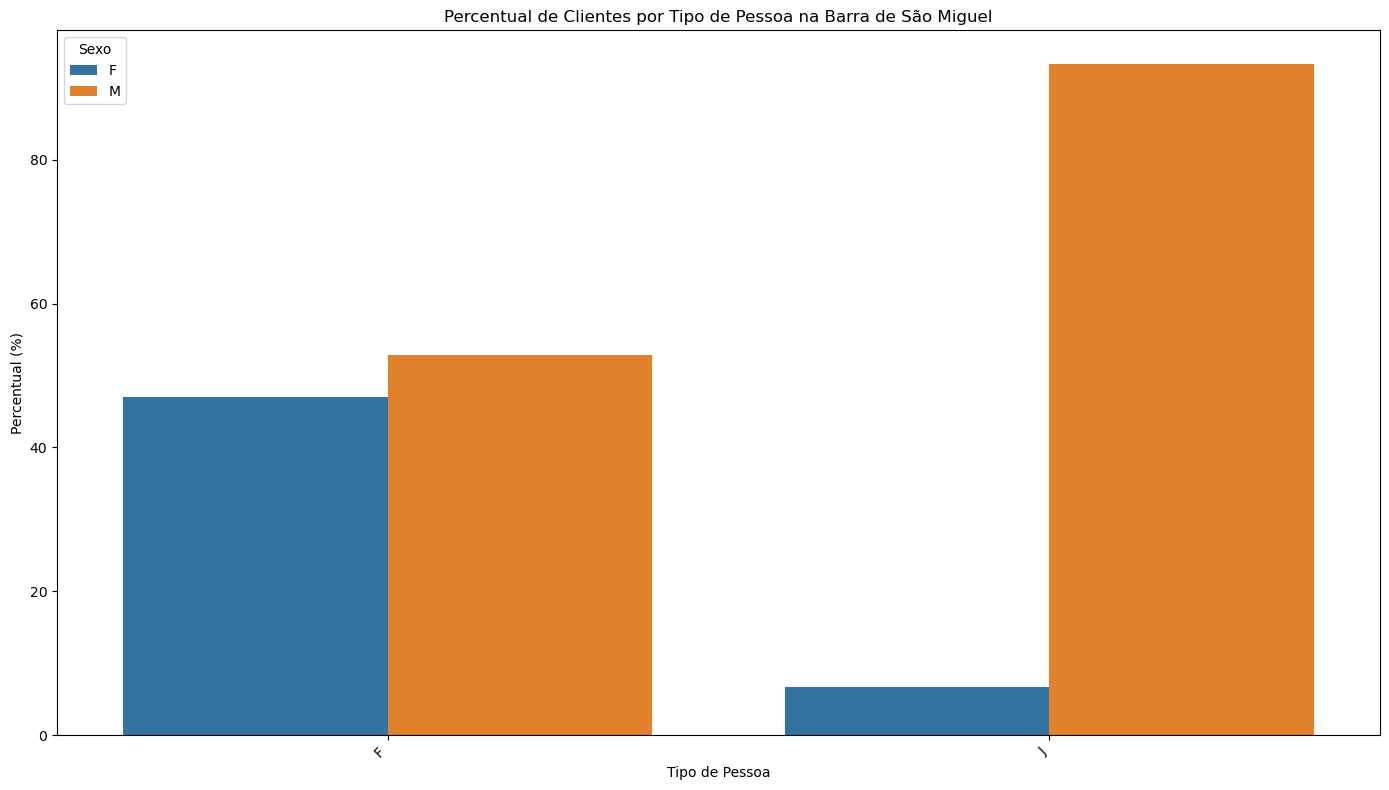

,tipoPessoa,Sexo,percentual
0,F,F,47.075525
1,F,M,52.924475
2,J,F,6.666667
3,J,M,93.333333


In [47]:
# Filtrando por sexo 'M' e 'F'
df_analise = df[df['Sexo'].isin(['M', 'F'])]

# Filtrando apenas as cidades desejadas
cidades_desejadas = ["Barra de São Miguel"]
df_analise = df_analise[df_analise['nomeCidade'].isin(cidades_desejadas)]

# Calculando o percentual de clientes por tipo de pessoa e sexo
analise_percentual = df_analise.groupby(['tipoPessoa', 'Sexo']).size().reset_index(name='contagem')
analise_percentual['percentual'] = analise_percentual.groupby('tipoPessoa')['contagem'].transform(lambda x: 100 * x / x.sum())

# Criando o gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x='tipoPessoa', y='percentual', hue='Sexo', data=analise_percentual)
plt.title('Percentual de Clientes por Tipo de Pessoa na Barra de São Miguel')
plt.xlabel('Tipo de Pessoa')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exibindo a tabela com os resultados
display(analise_percentual[['tipoPessoa', 'Sexo', 'percentual']])

## Marechal Deodoro

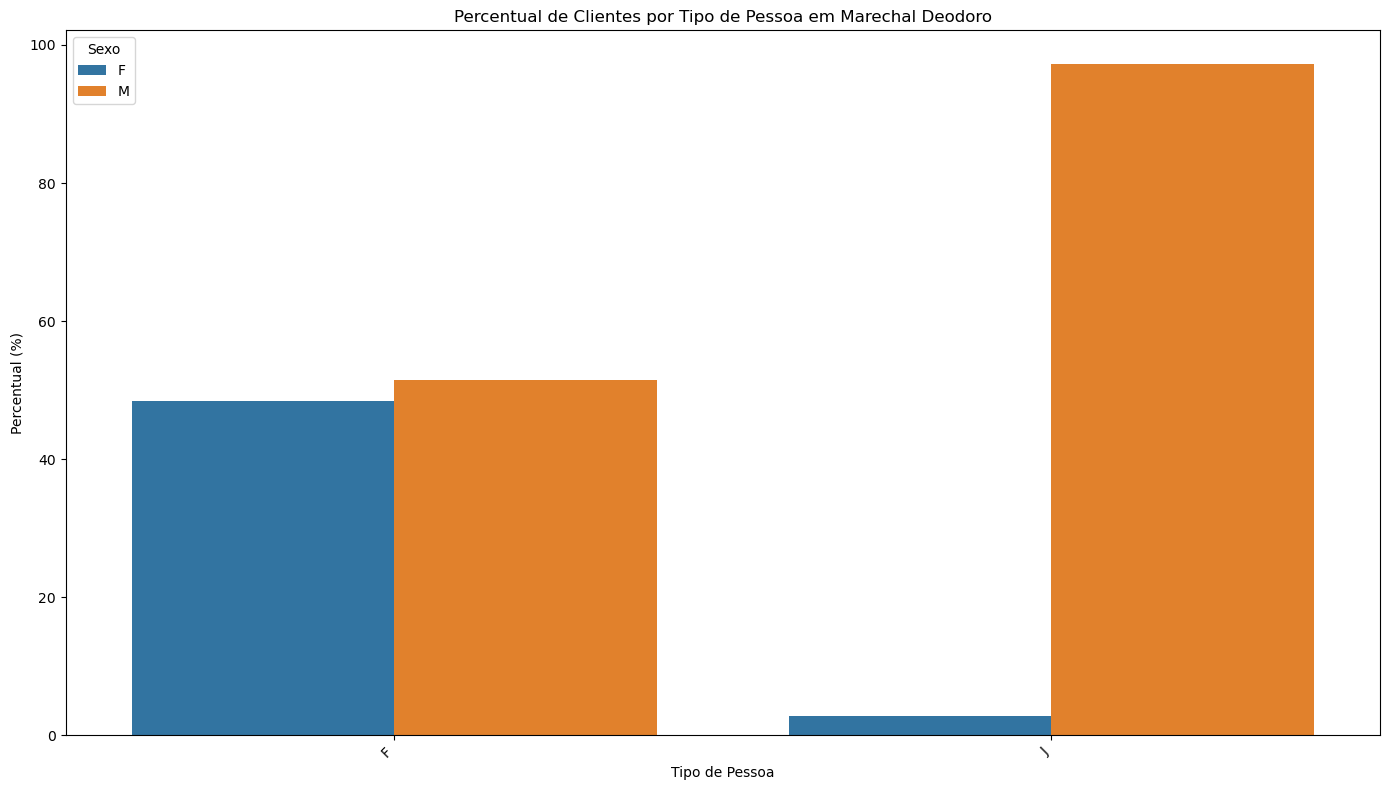

,tipoPessoa,Sexo,percentual
0,F,F,48.477467
1,F,M,51.522533
2,J,F,2.739726
3,J,M,97.260274


In [50]:
# Filtrando por sexo 'M' e 'F'
df_analise = df[df['Sexo'].isin(['M', 'F'])]

# Filtrando apenas as cidades desejadas
cidades_desejadas = ["Marechal Deodoro"]
df_analise = df_analise[df_analise['nomeCidade'].isin(cidades_desejadas)]

# Calculando o percentual de clientes por tipo de pessoa e sexo
analise_percentual = df_analise.groupby(['tipoPessoa', 'Sexo']).size().reset_index(name='contagem')
analise_percentual['percentual'] = analise_percentual.groupby('tipoPessoa')['contagem'].transform(lambda x: 100 * x / x.sum())

# Criando o gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x='tipoPessoa', y='percentual', hue='Sexo', data=analise_percentual)
plt.title('Percentual de Clientes por Tipo de Pessoa em Marechal Deodoro')
plt.xlabel('Tipo de Pessoa')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exibindo a tabela com os resultados
display(analise_percentual[['tipoPessoa', 'Sexo', 'percentual']])

## Tipo de Cliente Fiscal por Gênero - Barra de São Miguel


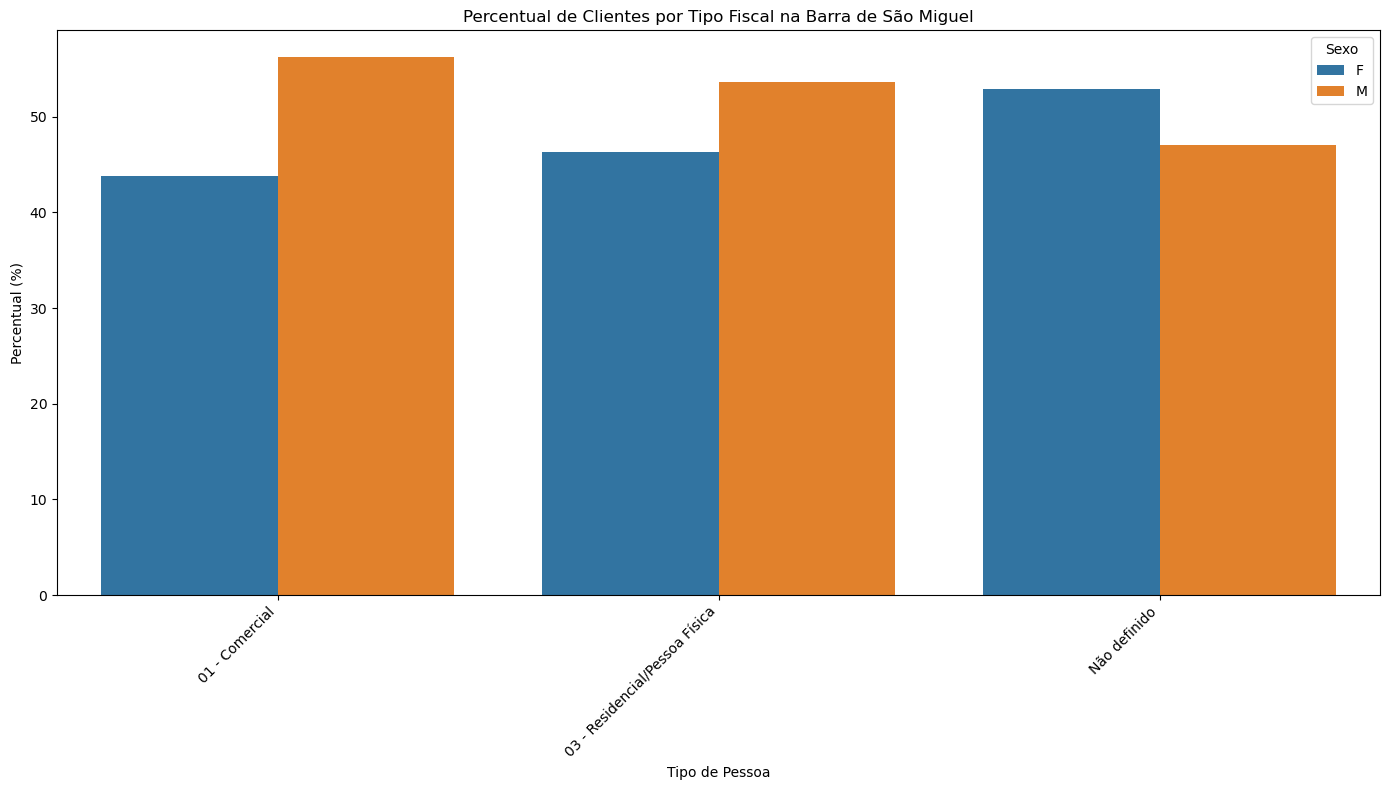

,tipoClienteFiscal,Sexo,percentual
0,01 - Comercial,F,43.775100
1,01 - Comercial,M,56.224900
2,03 - Residencial/Pessoa Física,F,46.363636
3,03 - Residencial/Pessoa Física,M,53.636364
4,Não definido,F,52.941176
5,Não definido,M,47.058824


In [53]:
# Filtrando por sexo 'M' e 'F'
df_analise = df[df['Sexo'].isin(['M', 'F'])]

# Filtrando apenas as cidades desejadas
cidades_desejadas = ["Barra de São Miguel"]
df_analise = df_analise[df_analise['nomeCidade'].isin(cidades_desejadas)]

analise_percentual = df_analise.groupby(['tipoClienteFiscal', 'Sexo']).size().reset_index(name='contagem')
analise_percentual['percentual'] = analise_percentual.groupby('tipoClienteFiscal')['contagem'].transform(lambda x: 100 * x / x.sum())

# Criando o gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x='tipoClienteFiscal', y='percentual', hue='Sexo', data=analise_percentual)
plt.title('Percentual de Clientes por Tipo Fiscal na Barra de São Miguel')
plt.xlabel('Tipo de Pessoa')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exibindo a tabela com os resultados
display(analise_percentual[['tipoClienteFiscal', 'Sexo', 'percentual']])

## Tipo de Cliente Fiscal por Gênero - Marechal Deodoro

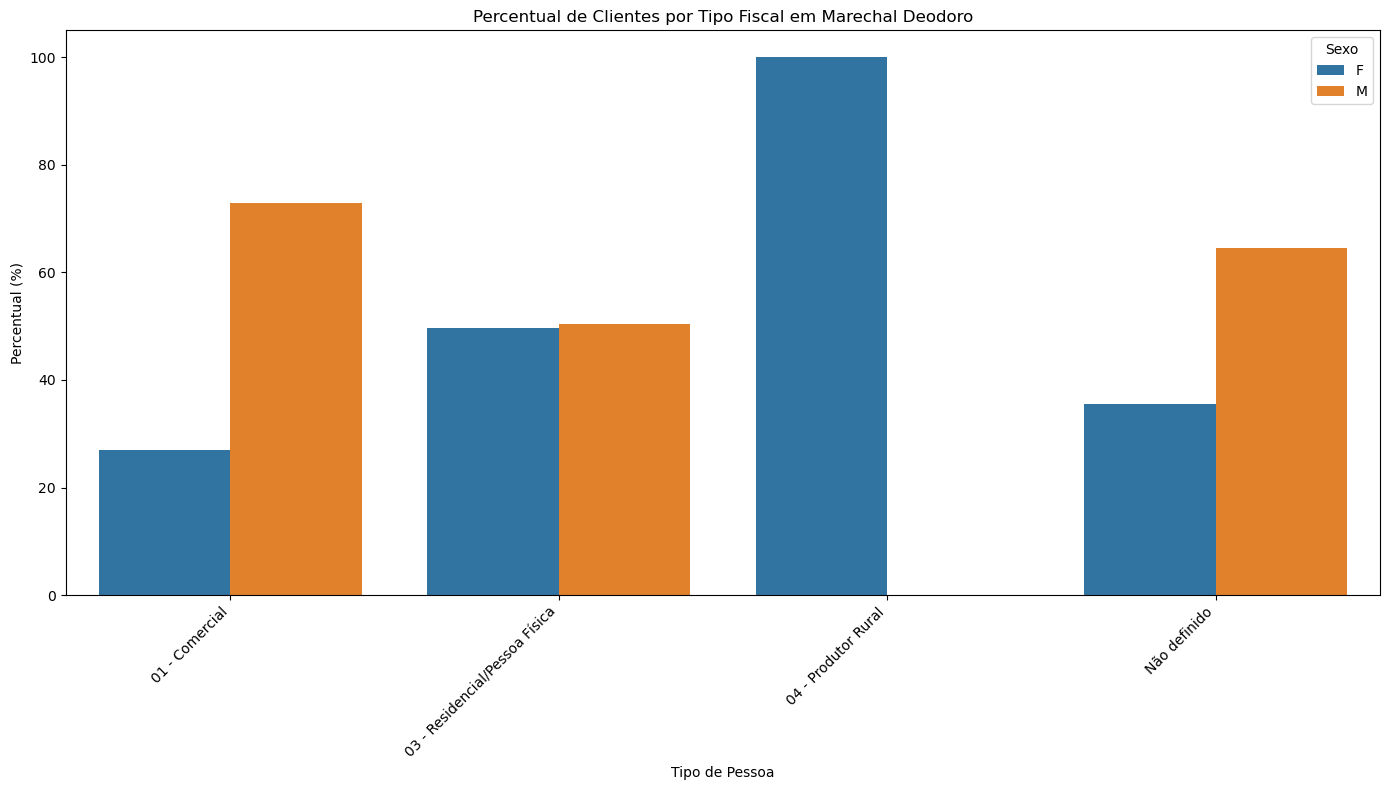

,tipoClienteFiscal,Sexo,percentual
0,01 - Comercial,F,27.027027
1,01 - Comercial,M,72.972973
2,03 - Residencial/Pessoa Física,F,49.691992
3,03 - Residencial/Pessoa Física,M,50.308008
4,04 - Produtor Rural,F,100.000000
5,Não definido,F,35.483871
6,Não definido,M,64.516129


In [56]:
# Filtrando por sexo 'M' e 'F'
df_analise = df[df['Sexo'].isin(['M', 'F'])]

# Filtrando apenas as cidades desejadas
cidades_desejadas = ["Marechal Deodoro"]
df_analise = df_analise[df_analise['nomeCidade'].isin(cidades_desejadas)]

analise_percentual = df_analise.groupby(['tipoClienteFiscal', 'Sexo']).size().reset_index(name='contagem')
analise_percentual['percentual'] = analise_percentual.groupby('tipoClienteFiscal')['contagem'].transform(lambda x: 100 * x / x.sum())

# Criando o gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x='tipoClienteFiscal', y='percentual', hue='Sexo', data=analise_percentual)
plt.title('Percentual de Clientes por Tipo Fiscal em Marechal Deodoro')
plt.xlabel('Tipo de Pessoa')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exibindo a tabela com os resultados
display(analise_percentual[['tipoClienteFiscal', 'Sexo', 'percentual']])

## Percentual por tipo de cliente - Geral

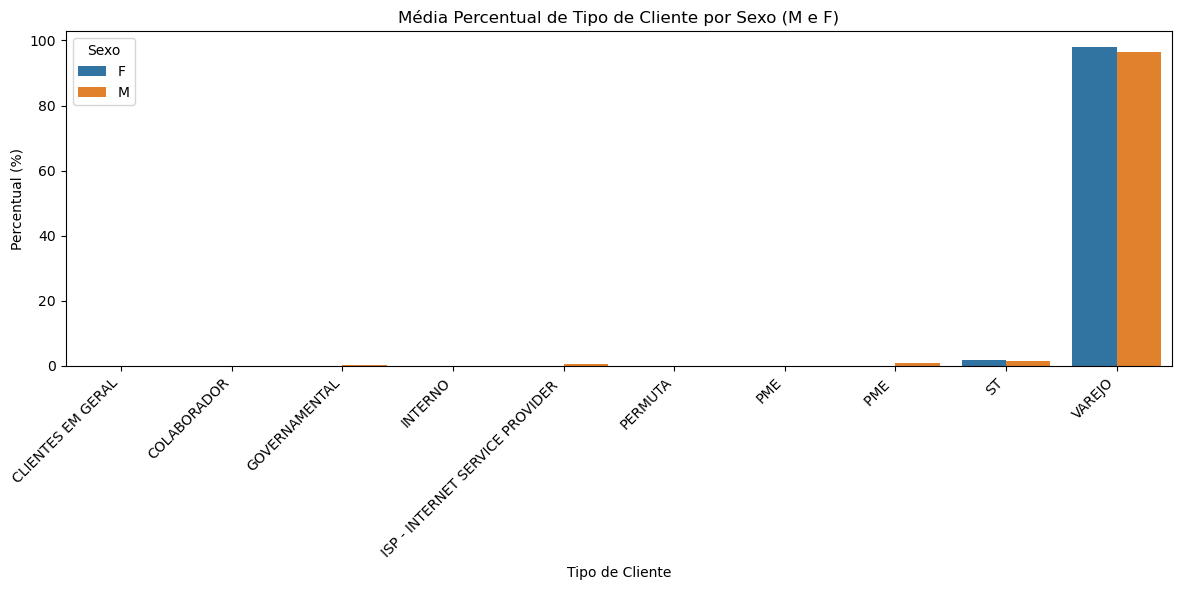

,tipoCliente,Sexo,percentual
0,CLIENTES EM GERAL,F,0.036153
1,CLIENTES EM GERAL,M,0.025032
2,COLABORADOR,F,0.007231
3,COLABORADOR,M,0.005563
4,GOVERNAMENTAL,F,0.065076
5,GOVERNAMENTAL,M,0.314290
6,INTERNO,F,0.002410
7,ISP - INTERNET SERVICE PROVIDER,F,0.026512
8,ISP - INTERNET SERVICE PROVIDER,M,0.586861
9,PERMUTA,F,0.004820


In [59]:
# Removendo linhas com valores ausentes em 'tipoCliente' ou 'Sexo'
df_analise = df.dropna(subset=['tipoCliente', 'Sexo'])

# Filtrando por sexo 'M' e 'F'
df_analise = df_analise[df_analise['Sexo'].isin(['M', 'F'])]

# Calculando a contagem de cada combinação de tipo de cliente e sexo
contagem = df_analise.groupby(['tipoCliente', 'Sexo']).size().reset_index(name='contagem')

# Calculando a média percentual do tipo de cliente por sexo usando transform
contagem['percentual'] = contagem['contagem'] / contagem.groupby('Sexo')['contagem'].transform('sum') * 100

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='tipoCliente', y='percentual', hue='Sexo', data=contagem)
plt.title('Média Percentual de Tipo de Cliente por Sexo (M e F)')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exibindo a tabela com os resultados
display(contagem[['tipoCliente', 'Sexo', 'percentual']])


## Percentual por tipo de cliente - Barra de São Miguel

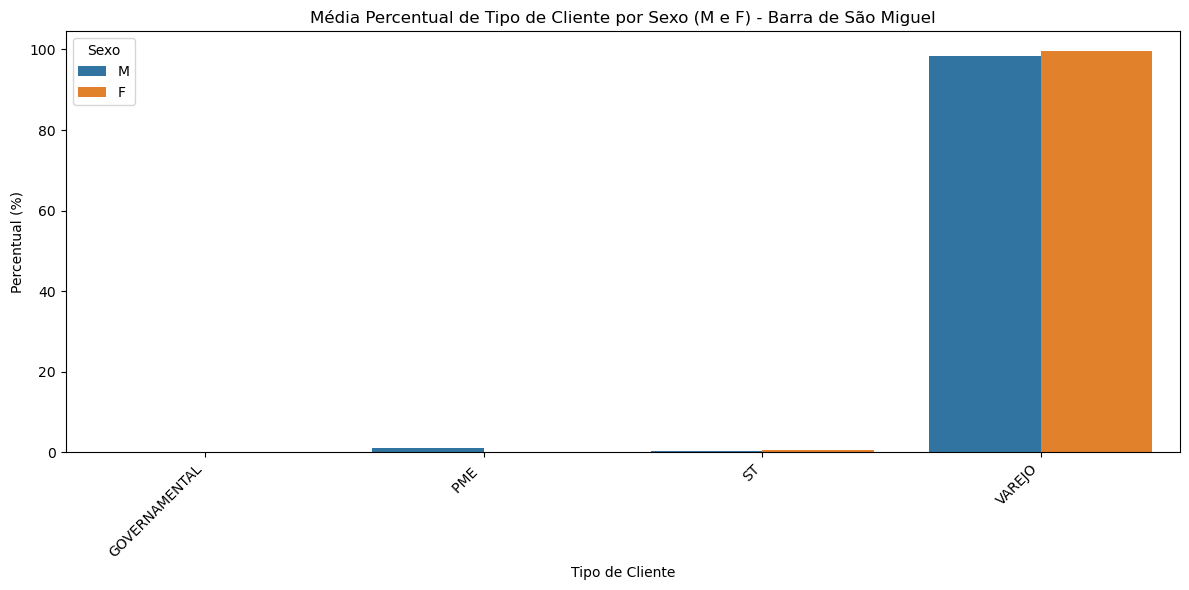

,tipoCliente,Sexo,percentual
0,GOVERNAMENTAL,M,0.102669
1,PME,M,1.026694
2,ST,F,0.480769
3,ST,M,0.410678
4,VAREJO,F,99.519231
5,VAREJO,M,98.459959


In [62]:
# Removendo linhas com valores ausentes em 'tipoCliente' ou 'Sexo'
df_analise = df.dropna(subset=['tipoCliente', 'Sexo'])

# Filtrando apenas as cidades desejadas
cidades_desejadas = ["Barra de São Miguel"]
df_analise = df_analise[df_analise['nomeCidade'].isin(cidades_desejadas)]

# Filtrando por sexo 'M' e 'F'
df_analise = df_analise[df_analise['Sexo'].isin(['M', 'F'])]

# Calculando a contagem de cada combinação de tipo de cliente e sexo
contagem = df_analise.groupby(['tipoCliente', 'Sexo']).size().reset_index(name='contagem')

# Calculando a média percentual do tipo de cliente por sexo
contagem['percentual'] = contagem['contagem'] / contagem.groupby('Sexo')['contagem'].transform('sum') * 100

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='tipoCliente', y='percentual', hue='Sexo', data=contagem)
plt.title('Média Percentual de Tipo de Cliente por Sexo (M e F) - Barra de São Miguel')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exibindo a tabela com os resultados
display(contagem[['tipoCliente', 'Sexo', 'percentual']])

## Percentual por tipo de cliente - Marechal Deodoro

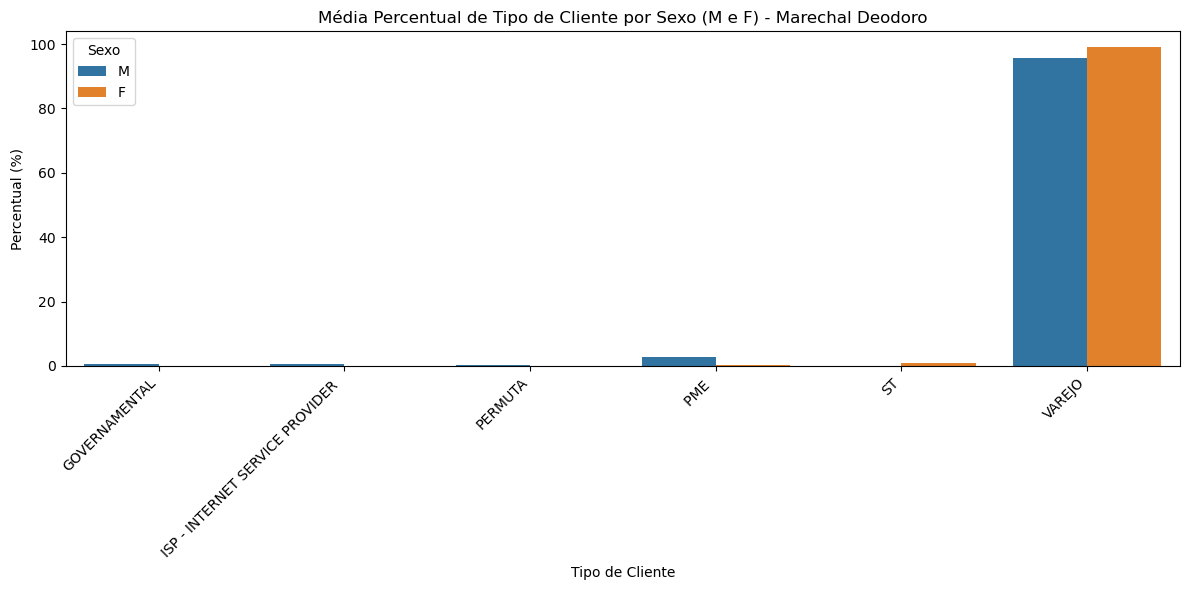

,tipoCliente,Sexo,percentual
0,GOVERNAMENTAL,M,0.545256
1,ISP - INTERNET SERVICE PROVIDER,M,0.545256
2,PERMUTA,M,0.218103
3,PME,F,0.250627
4,PME,M,2.835333
5,ST,F,0.751880
6,ST,M,0.109051
7,VAREJO,F,98.997494
8,VAREJO,M,95.747001


In [65]:
# Removendo linhas com valores ausentes em 'tipoCliente' ou 'Sexo'
df_analise = df.dropna(subset=['tipoCliente', 'Sexo'])

# Filtrando apenas as cidades desejadas
cidades_desejadas = ["Marechal Deodoro"]
df_analise = df_analise[df_analise['nomeCidade'].isin(cidades_desejadas)]

# Filtrando por sexo 'M' e 'F'
df_analise = df_analise[df_analise['Sexo'].isin(['M', 'F'])]

# Calculando a contagem de cada combinação de tipo de cliente e sexo
contagem = df_analise.groupby(['tipoCliente', 'Sexo']).size().reset_index(name='contagem')

# Calculando a média percentual do tipo de cliente por sexo
contagem['percentual'] = contagem['contagem'] / contagem.groupby('Sexo')['contagem'].transform('sum') * 100

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='tipoCliente', y='percentual', hue='Sexo', data=contagem)
plt.title('Média Percentual de Tipo de Cliente por Sexo (M e F) - Marechal Deodoro')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exibindo a tabela com os resultados
display(contagem[['tipoCliente', 'Sexo', 'percentual']])

## Tipo de Assinante por Gênero - Geral

,Sexo,tipoAssinate,count,percentual
0,F,25,1,11.111111
1,F,35,1,11.111111
2,F,Comercial/Industrial,1,11.111111
3,F,Não definido,1,11.111111
4,F,Outros,1,11.111111
5,F,Poder Público,1,11.111111
6,F,Público,1,11.111111
7,F,Residencial/Pessoa física,1,11.111111
8,F,Semi-Público,1,11.111111
9,M,25,1,11.111111


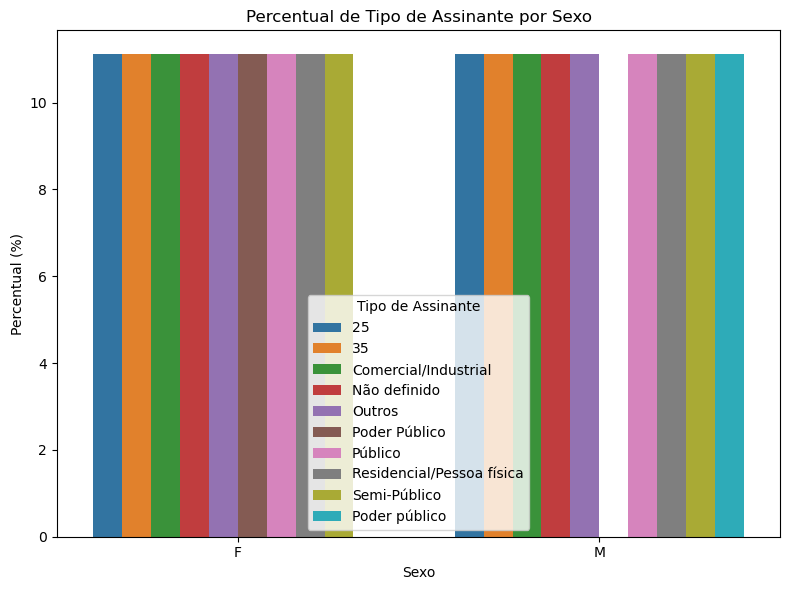

In [70]:
# Criar o DataFrame
df = pd.DataFrame({
    'tipoAssinate': ['Residencial/Pessoa física', 'Residencial/Pessoa física', 'Comercial/Industrial', 'Comercial/Industrial',
                    'Poder público', 'Poder Público','25','25', '35','35', 'Não definido', 'Não definido', 'Outros', 'Outros',
                    'Público', 'Público', 'Semi-Público', 'Semi-Público'],
    'Sexo': ['M', 'F', 'M', 'F',  'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F']  
})

# Calcular contagens totais
total_counts = df.groupby(['Sexo', 'tipoAssinate']).size().reset_index(name='count')
total_counts['percentual'] = total_counts['count'] / total_counts.groupby('Sexo')['count'].transform('sum') * 100

# Exibir os resultados
display(total_counts)

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Sexo', y='percentual', hue='tipoAssinate', data=total_counts)
plt.title('Percentual de Tipo de Assinante por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Percentual (%)')
plt.legend(title='Tipo de Assinante')
plt.tight_layout()
plt.show()


## Tipo de Assinante por Gênero - Barra de São Miguel

,Sexo,tipoAssinate,count,percentual
0,F,Comercial/Industrial,1,25.0
1,F,Outros,1,25.0
2,F,Poder público,1,25.0
3,F,Residencial/Pessoa física,1,25.0
4,M,Comercial/Industrial,1,20.0
5,M,Não definido,1,20.0
6,M,Poder público,1,20.0
7,M,Residencial/Pessoa física,1,20.0
8,M,Semi-Público,1,20.0


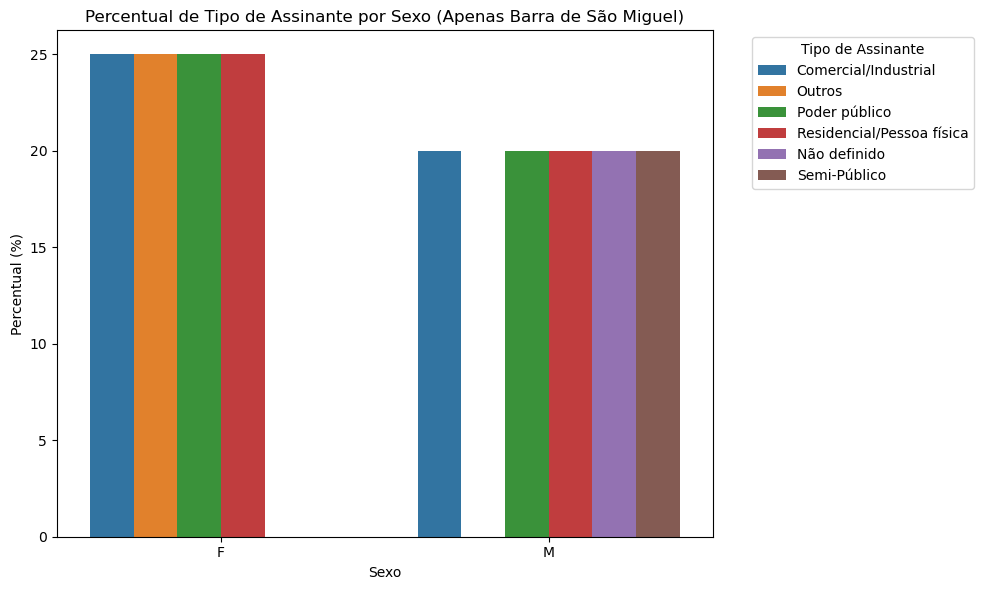

In [82]:
# Criar o DataFrame
df = pd.DataFrame({
    'nomeCidade': ['Barra de São Miguel'] * 9,
    'tipoAssinate': ['Residencial/Pessoa física', 'Residencial/Pessoa física', 'Comercial/Industrial',
                     'Comercial/Industrial', 'Poder público', 'Poder público',
                     'Não definido', 'Outros', 'Semi-Público'],
    'Sexo': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M',]
})

# Filtrar apenas os dados da cidade de Barra de São Miguel
df_analise = df[df['nomeCidade'] == "Barra de São Miguel"]

# Calcular contagens totais
total_counts = df_analise.groupby(['Sexo', 'tipoAssinate']).size().reset_index(name='count')

# Calcular percentual dentro de cada categoria de Sexo
total_counts['percentual'] = total_counts.groupby('Sexo')['count'].transform(lambda x: (x / x.sum()) * 100)

# Exibir os resultados
display(total_counts)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Sexo', y='percentual', hue='tipoAssinate', data=total_counts)

# Configurações do gráfico
plt.title('Percentual de Tipo de Assinante por Sexo (Apenas Barra de São Miguel)')
plt.xlabel('Sexo')
plt.ylabel('Percentual (%)')
plt.legend(title='Tipo de Assinante', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Tipo de Assinante por Gênero - Marechal Deodoro

,Sexo,tipoAssinate,count,percentual
0,F,Comercial/Industrial,1,25.0
1,F,Outros,1,25.0
2,F,Poder público,1,25.0
3,F,Residencial/Pessoa física,1,25.0
4,M,Comercial/Industrial,1,20.0
5,M,Não definido,1,20.0
6,M,Poder público,1,20.0
7,M,Residencial/Pessoa física,1,20.0
8,M,Semi-Público,1,20.0


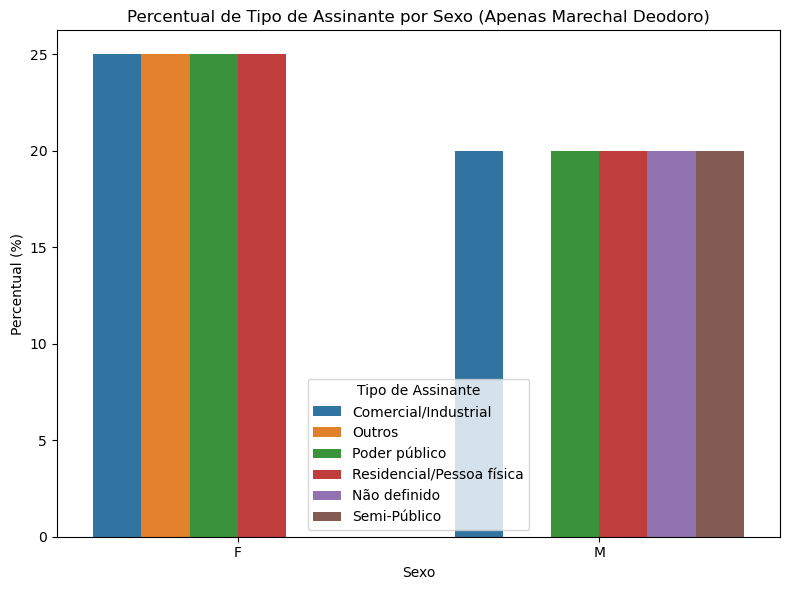

In [88]:
df = pd.DataFrame({
    'nomeCidade': ['Marechal Deodoro'] * 9,
    'tipoAssinate': ['Residencial/Pessoa física', 'Residencial/Pessoa física', 'Comercial/Industrial',
                     'Comercial/Industrial', 'Poder público', 'Poder público',
                     'Não definido', 'Outros', 'Semi-Público'],
    'Sexo': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M',]
})

# Filtrar apenas os dados da cidade de Barra de São Miguel
df_analise = df[df['nomeCidade'] == "Marechal Deodoro"]

# Calcular contagens totais
total_counts = df_analise.groupby(['Sexo', 'tipoAssinate']).size().reset_index(name='count')
total_counts['percentual'] = total_counts['count'] / total_counts.groupby('Sexo')['count'].transform('sum') * 100

# Exibir os resultados
display(total_counts)

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Sexo', y='percentual', hue='tipoAssinate', data=total_counts)
plt.title('Percentual de Tipo de Assinante por Sexo (Apenas Marechal Deodoro)')
plt.xlabel('Sexo')
plt.ylabel('Percentual (%)')
plt.legend(title='Tipo de Assinante')
plt.tight_layout()
plt.show()


## Percentual de Clientes Ativos

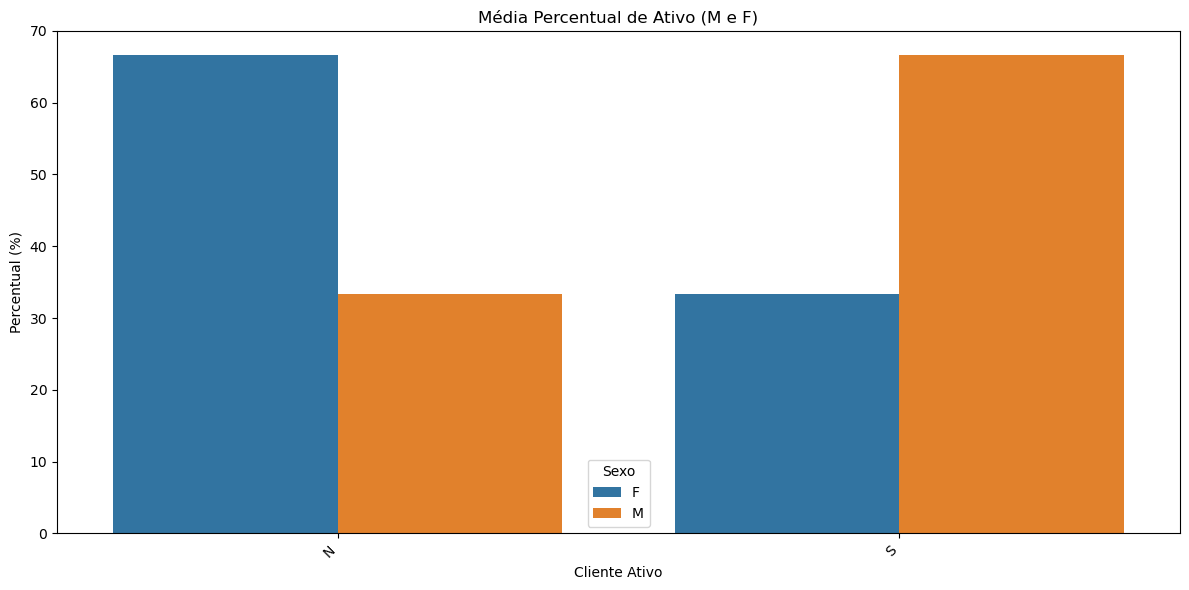

  Ativo Sexo  percentual
0     N    F   66.666667
1     N    M   33.333333
2     S    F   33.333333
3     S    M   66.666667


In [98]:
# Criando o DataFrame inicial
df = pd.DataFrame({
    'Ativo': ['S', 'N', 'S', 'N', 'S', 'N'],
    'Sexo': ['M', 'F', 'M', 'F', 'F', 'M']
})

# Removendo linhas com valores ausentes nas colunas 'Ativo' e 'Sexo'
df_analise = df.dropna(subset=['Ativo', 'Sexo'])

# Filtrando apenas os valores válidos para 'Ativo' e 'Sexo'
df_analise = df_analise[df_analise['Ativo'].isin(['S', 'N'])]
df_analise = df_analise[df_analise['Sexo'].isin(['M', 'F'])]

# Contando os valores de 'Ativo' e 'Sexo'
contagem = df_analise.groupby(['Ativo', 'Sexo']).size().reset_index(name='contagem')

# Calculando a média percentual do tipo de cliente por sexo usando transform
contagem['percentual'] = contagem['contagem'] / contagem.groupby('Sexo')['contagem'].transform('sum') * 100

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Ativo', y='percentual', hue='Sexo', data=contagem)
plt.title('Média Percentual de Ativo (M e F)')
plt.xlabel('Cliente Ativo')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exibindo a tabela com os resultados
print(contagem[['Ativo', 'Sexo', 'percentual']])

## Percentual de Clientes Ativos - Marechal Deodoro

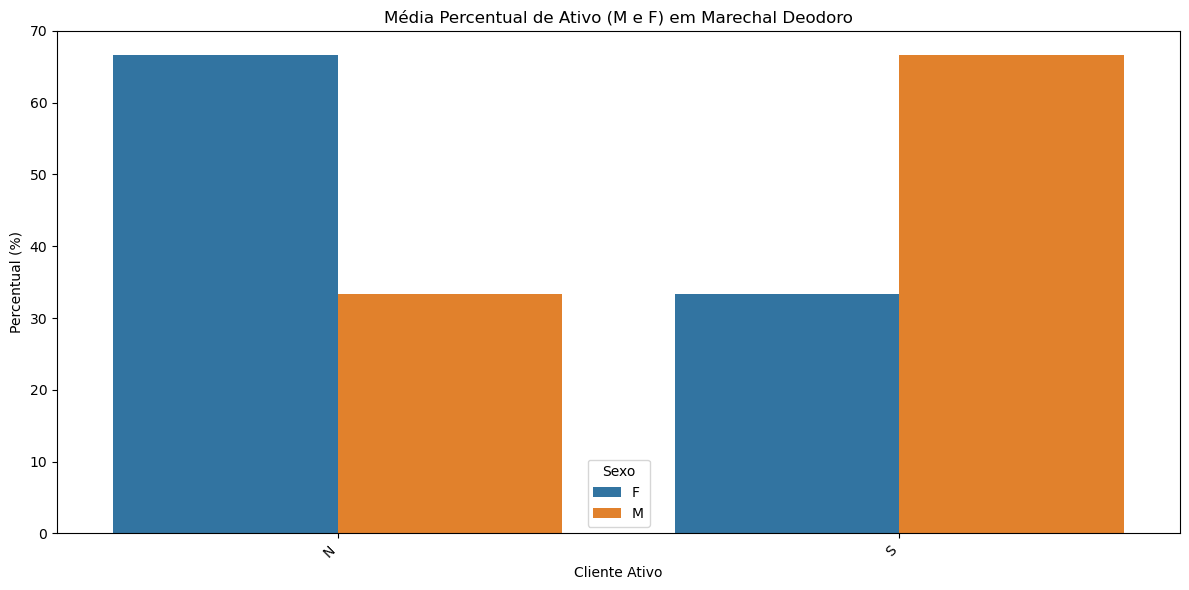

  Ativo Sexo  percentual
0     N    F   66.666667
1     N    M   33.333333
2     S    F   33.333333
3     S    M   66.666667


In [103]:
df = pd.DataFrame({
    'Ativo': ['S', 'N', 'S', 'N', 'S', 'N'],
    'Sexo': ['M', 'F', 'M', 'F', 'F', 'M'],
    'nomeCidade': ['Marechal Deodoro', 'Marechal Deodoro', 'Marechal Deodoro', 'Marechal Deodoro', 'Marechal Deodoro', 'Marechal Deodoro']
})

# Removendo linhas com valores ausentes nas colunas 'Ativo', 'Sexo' e 'nomeCidade'
df_analise = df.dropna(subset=['Ativo', 'Sexo', 'nomeCidade'])

# Filtrando apenas os valores válidos para 'Ativo', 'Sexo' e 'nomeCidade'
df_analise = df_analise[df_analise['Ativo'].isin(['S', 'N'])]
df_analise = df_analise[df_analise['Sexo'].isin(['M', 'F'])]
df_analise = df_analise[df_analise['nomeCidade'] == 'Marechal Deodoro']

# Contando os valores de 'Ativo' e 'Sexo'
contagem = df_analise.groupby(['Ativo', 'Sexo']).size().reset_index(name='contagem')

# Calculando a média percentual do tipo de cliente por sexo usando transform
contagem['percentual'] = contagem['contagem'] / contagem.groupby('Sexo')['contagem'].transform('sum') * 100

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Ativo', y='percentual', hue='Sexo', data=contagem)
plt.title('Média Percentual de Ativo (M e F) em Marechal Deodoro')
plt.xlabel('Cliente Ativo')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exibindo a tabela com os resultados
print(contagem[['Ativo', 'Sexo', 'percentual']])


## Percentual de Clientes Ativos - Barra de São Miguel

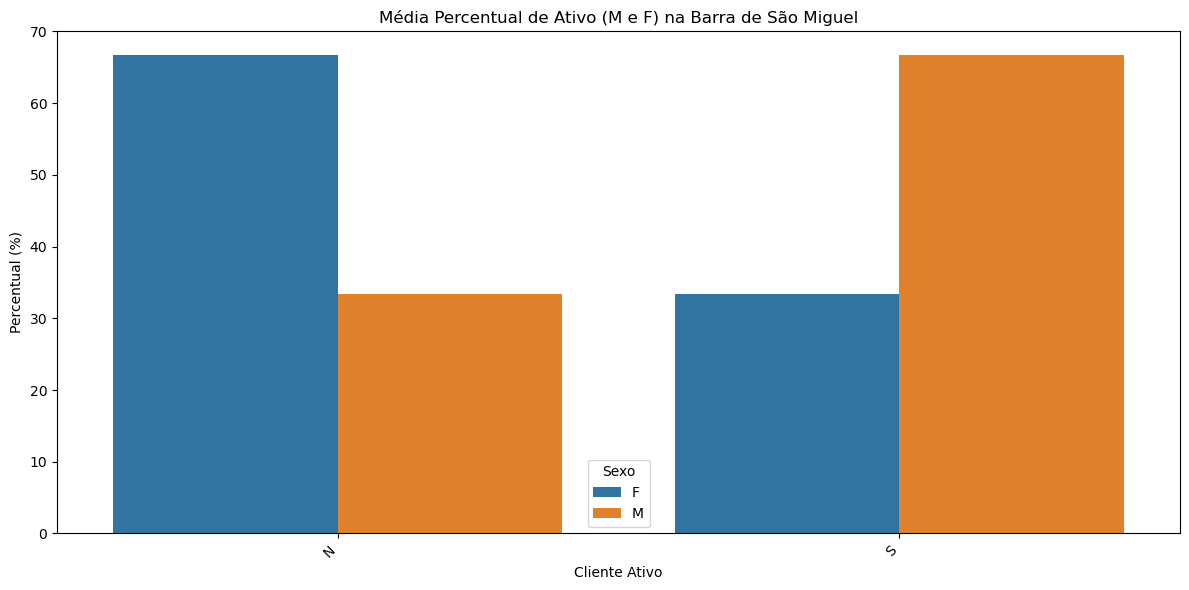

  Ativo Sexo  percentual
0     N    F   66.666667
1     N    M   33.333333
2     S    F   33.333333
3     S    M   66.666667


In [111]:
df = pd.DataFrame({
    'Ativo': ['S', 'N', 'S', 'N', 'S', 'N'],
    'Sexo': ['M', 'F', 'M', 'F', 'F', 'M'],
    'nomeCidade': ['Barra de São Miguel', 'Barra de São Miguel', 'Barra de São Miguel', 'Barra de São Miguel', 'Barra de São Miguel', 'Barra de São Miguel']
})

# Removendo linhas com valores ausentes nas colunas 'Ativo', 'Sexo' e 'nomeCidade'
df_analise = df.dropna(subset=['Ativo', 'Sexo', 'nomeCidade'])

# Filtrando apenas os valores válidos para 'Ativo', 'Sexo' e 'nomeCidade'
df_analise = df_analise[df_analise['Ativo'].isin(['S', 'N'])]
df_analise = df_analise[df_analise['Sexo'].isin(['M', 'F'])]
df_analise = df_analise[df_analise['nomeCidade'] == 'Barra de São Miguel']

# Contando os valores de 'Ativo' e 'Sexo'
contagem = df_analise.groupby(['Ativo', 'Sexo']).size().reset_index(name='contagem')

# Calculando a média percentual do tipo de cliente por sexo usando transform
contagem['percentual'] = contagem['contagem'] / contagem.groupby('Sexo')['contagem'].transform('sum') * 100

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Ativo', y='percentual', hue='Sexo', data=contagem)
plt.title('Média Percentual de Ativo (M e F) na Barra de São Miguel')
plt.xlabel('Cliente Ativo')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exibindo a tabela com os resultados
print(contagem[['Ativo', 'Sexo', 'percentual']])

## Planilha fTransformados - Contrato Geral

In [114]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display

In [116]:
df = pd.read_csv("fContratoGeral.csv")
df.head(2)

,idContrato,idVdContrato,idTipoContrato,idCliente,idCidade,idFilial,idTipoDocumento,idModeloContrato,idCarteiraCobranca,idVendedor,...,dataCadastroSistema,dataAtivacao,dataDesistencia,dataCancelamento,statusContrato,motivoInclusao,taxaAtivacao,valorContrato,valorLiquidoContrato,nomeBanco
0,9947-Veloo,2127-Veloo,25-Veloo,11164-Veloo,1704-Veloo,1-Veloo,501-Veloo,1-Veloo,1-Veloo,12-Veloo,...,NaN,2020-03-19T00:00,NaN,2021-06-25T00:00,I,Instalação,0.0,0.0,3680.0,Veloo
1,9991-Veloo,890-Veloo,30-Veloo,12951-Veloo,1731-Veloo,1-Veloo,501-Veloo,1-Veloo,1-Veloo,2-Veloo,...,NaN,2017-04-19T00:00,NaN,2021-03-24T00:00,I,Instalação,0.0,NaN,0.0,Veloo


In [118]:
df.tail(2)

,idContrato,idVdContrato,idTipoContrato,idCliente,idCidade,idFilial,idTipoDocumento,idModeloContrato,idCarteiraCobranca,idVendedor,...,dataCadastroSistema,dataAtivacao,dataDesistencia,dataCancelamento,statusContrato,motivoInclusao,taxaAtivacao,valorContrato,valorLiquidoContrato,nomeBanco
139672,159048-Mass,3-Mass,29-Mass,120258-Mass,1695-Mass,1-Mass,501-Mass,2-Mass,1-Mass,15-Mass,...,2023-11-04T00:00,2023-11-04T00:00,NaN,2024-06-28T00:00,I,Instalação,0.0,64.99,64.99,Mass
139673,159071-Mass,3-Mass,9-Mass,120278-Mass,1695-Mass,1-Mass,501-Mass,2-Mass,1-Mass,13-Mass,...,2023-11-06T00:00,2023-11-06T00:00,NaN,2024-02-16T00:00,I,Instalação,0.0,64.99,64.99,Mass


In [120]:
print(df.dtypes)

idContrato                    object
idVdContrato                  object
idTipoContrato                object
idCliente                     object
idCidade                      object
idFilial                      object
idTipoDocumento               object
idModeloContrato              object
idCarteiraCobranca            object
idVendedor                    object
idMotivoCancelamento          object
idMotivoDesistencia           object
idResponsavelDesistencia      object
idResponsavelCancelamento     object
enderecoPadraoCliente         object
descricaoPlano                object
obsCancelamento               object
diaVencimento                  int64
dataRenovacao                 object
dataCadastroSistema           object
dataAtivacao                  object
dataDesistencia               object
dataCancelamento              object
statusContrato                object
motivoInclusao                object
taxaAtivacao                 float64
valorContrato                float64
v

In [122]:
df['dataRenovacao'] = pd.to_datetime(df['dataRenovacao'], errors='coerce')
df['dataCadastroSistema'] = pd.to_datetime(df['dataCadastroSistema'], errors='coerce')
df['dataAtivacao'] = pd.to_datetime(df['dataAtivacao'], errors='coerce')
df['dataDesistencia'] = pd.to_datetime(df['dataDesistencia'], errors='coerce')
df['dataCancelamento'] = pd.to_datetime(df['dataCancelamento'], errors='coerce')

print(df.dtypes)


idContrato                           object
idVdContrato                         object
idTipoContrato                       object
idCliente                            object
idCidade                             object
idFilial                             object
idTipoDocumento                      object
idModeloContrato                     object
idCarteiraCobranca                   object
idVendedor                           object
idMotivoCancelamento                 object
idMotivoDesistencia                  object
idResponsavelDesistencia             object
idResponsavelCancelamento            object
enderecoPadraoCliente                object
descricaoPlano                       object
obsCancelamento                      object
diaVencimento                         int64
dataRenovacao                datetime64[ns]
dataCadastroSistema          datetime64[ns]
dataAtivacao                 datetime64[ns]
dataDesistencia              datetime64[ns]
dataCancelamento             dat

## Tempo médio entre a ativação do contrato e o cancelamento


In [125]:
#Calcular a diferença de tempo entre ativação e cancelamento
df['tempoAtivacaoCancelamento'] = df['dataCancelamento'] - df['dataAtivacao']

# Calcular o tempo médio
tempo_medio = df['tempoAtivacaoCancelamento'].mean()

# Exibir o resultado
print(f'Tempo médio entre a ativação e o cancelamento: {tempo_medio}')

Tempo médio entre a ativação e o cancelamento: 719 days 06:45:48.447357648


### Barra de São Miguel

In [156]:
df_barra = df[df['idCidade'].isin(['1654-Veloo', '1654-Itelx'])].copy()

# Calcular a diferença de tempo entre ativação e cancelamento
df_barra['tempoAtivacaoCancelamento'] = df_barra['dataCancelamento'] - df_barra['dataAtivacao']

# Calcular o tempo médio
tempo_medio = df_barra['tempoAtivacaoCancelamento'].mean()

# Exibir o resultado
print(f'Tempo médio entre a ativação e o cancelamento na Barra de São Miguel: {tempo_medio}')


Tempo médio entre a ativação e o cancelamento na Barra de São Miguel: 614 days 18:22:33.954305800


### Marechal Deodoro

Tempo médio entre a ativação e o cancelamento em Marechal Deodoro: 673 days 16:18:22.392344496


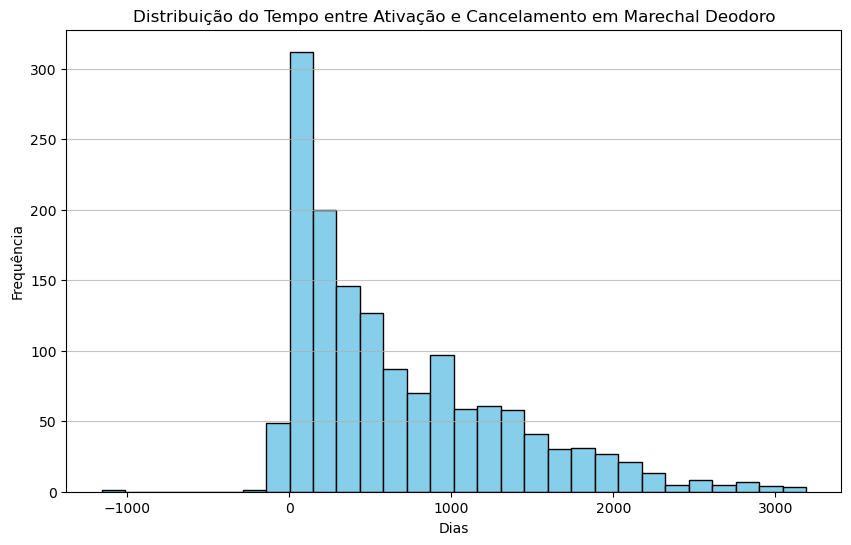

In [154]:
# Filtrar os dados para as cidades desejadas
df_marechal = df[df['idCidade'].isin(['1699-Veloo', '1699-Itelx'])].copy()

# Calcular a diferença de tempo entre ativação e cancelamento
df_marechal['tempoAtivacaoCancelamento'] = df_barra['dataCancelamento'] - df_marechal['dataAtivacao']

# Calcular o tempo médio
tempo_medio = df_marechal['tempoAtivacaoCancelamento'].mean()

# Exibir o resultado
print(f'Tempo médio entre a ativação e o cancelamento em Marechal Deodoro: {tempo_medio}')

# Plotar o gráfico da diferença de tempo
plt.figure(figsize=(10, 6))
plt.hist(df_barra['tempoAtivacaoCancelamento'].dt.days, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição do Tempo entre Ativação e Cancelamento em Marechal Deodoro')
plt.xlabel('Dias')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()


## Faturamento Total e Receita Líquida

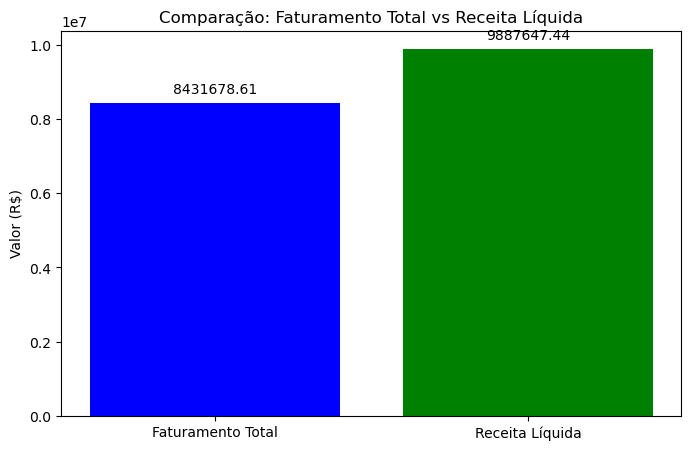

Faturamento Total: R$8431678.61
Receita Líquida: R$9887647.44


In [137]:
# Calcular Faturamento Total e Receita Líquida
faturamento_total = df['valorContrato'].sum()
receita_liquida = df['valorLiquidoContrato'].sum()

# Criar gráfico comparativo
fig, ax = plt.subplots(figsize=(8,5))
barras = ax.bar(['Faturamento Total', 'Receita Líquida'], [faturamento_total, receita_liquida], color=['blue', 'green'])

# Adicionar rótulos
ax.bar_label(barras, fmt='%.2f', padding=5)
ax.set_ylabel('Valor (R$)')
ax.set_title('Comparação: Faturamento Total vs Receita Líquida')

plt.show()

# Exibir valores calculados
print(f'Faturamento Total: R${faturamento_total:.2f}')
print(f'Receita Líquida: R${receita_liquida:.2f}')

## Faturamento Total e Receita Líquida - Barra de São Miguel

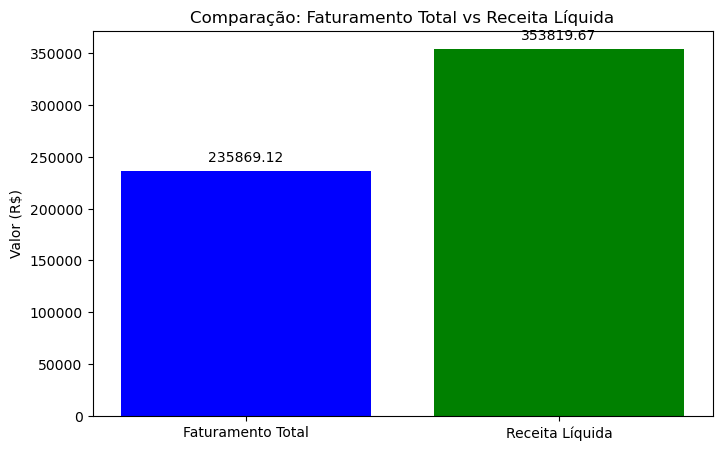

Faturamento Total: R$235869.12
Receita Líquida: R$353819.67


In [164]:
# Filtrar o DataFrame para as cidades especificadas
df_barra = df_barra = df[df['idCidade'].isin(['1654-Veloo', '1654-Itelx'])].copy()

# Calcular Faturamento Total e Receita Líquida
faturamento_total = df_barra['valorContrato'].sum()
receita_liquida = df_barra['valorLiquidoContrato'].sum()

# Criar gráfico comparativo
fig, ax = plt.subplots(figsize=(8, 5))
barras = ax.bar(['Faturamento Total', 'Receita Líquida'], [faturamento_total, receita_liquida], color=['blue', 'green'])

# Adicionar rótulos
ax.bar_label(barras, fmt='%.2f', padding=5)
ax.set_ylabel('Valor (R$)')
ax.set_title('Comparação: Faturamento Total vs Receita Líquida')

plt.show()

# Exibir valores calculados
print(f'Faturamento Total: R${faturamento_total:.2f}')
print(f'Receita Líquida: R${receita_liquida:.2f}')

## Faturamento Total e Receita Líquida - Marechal Deodoro

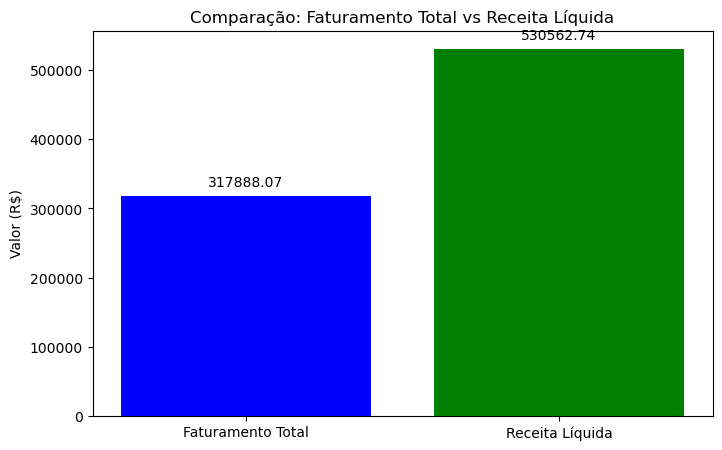

Faturamento Total: R$317888.07
Receita Líquida: R$530562.74


In [162]:
# Filtrar o DataFrame para as cidades especificadas
df_marechal = df[df['idCidade'].isin(['1699-Veloo', '1699-Itelx'])].copy()

# Calcular Faturamento Total e Receita Líquida
faturamento_total = df_marechal['valorContrato'].sum()
receita_liquida = df_marechal['valorLiquidoContrato'].sum()

# Criar gráfico comparativo
fig, ax = plt.subplots(figsize=(8, 5))
barras = ax.bar(['Faturamento Total', 'Receita Líquida'], [faturamento_total, receita_liquida], color=['blue', 'green'])

# Adicionar rótulos
ax.bar_label(barras, fmt='%.2f', padding=5)
ax.set_ylabel('Valor (R$)')
ax.set_title('Comparação: Faturamento Total vs Receita Líquida')

plt.show()

# Exibir valores calculados
print(f'Faturamento Total: R${faturamento_total:.2f}')
print(f'Receita Líquida: R${receita_liquida:.2f}')


## Gestão de Contrato

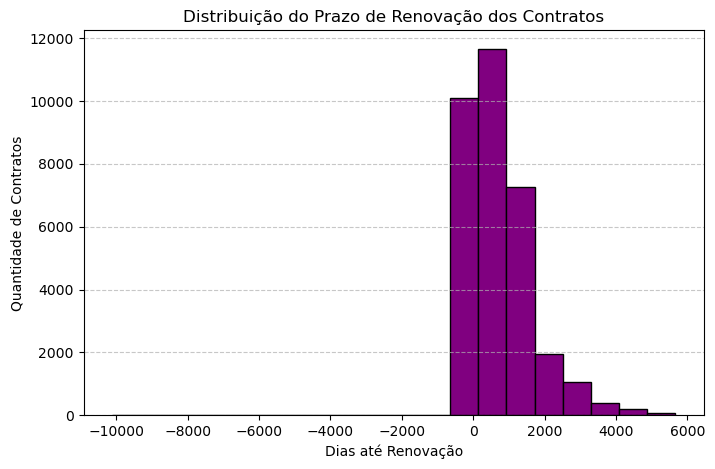

Média de dias até a renovação: 768.33
Mediana de dias até a renovação: 542.00


In [166]:
# Calcular diferença entre data de renovação e ativação
df['dias_ate_renovacao'] = (df['dataRenovacao'] - df['dataAtivacao']).dt.days

# Criar histograma para visualizar distribuição de prazos de renovação
plt.figure(figsize=(8, 5))
plt.hist(df['dias_ate_renovacao'].dropna(), bins=20, color='purple', edgecolor='black')
plt.xlabel('Dias até Renovação')
plt.ylabel('Quantidade de Contratos')
plt.title('Distribuição do Prazo de Renovação dos Contratos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Estatísticas sobre prazos de renovação
media_renovacao = df['dias_ate_renovacao'].mean()
mediana_renovacao = df['dias_ate_renovacao'].median()

print(f'Média de dias até a renovação: {media_renovacao:.2f}')
print(f'Mediana de dias até a renovação: {mediana_renovacao:.2f}')

### Barra de São Miguel

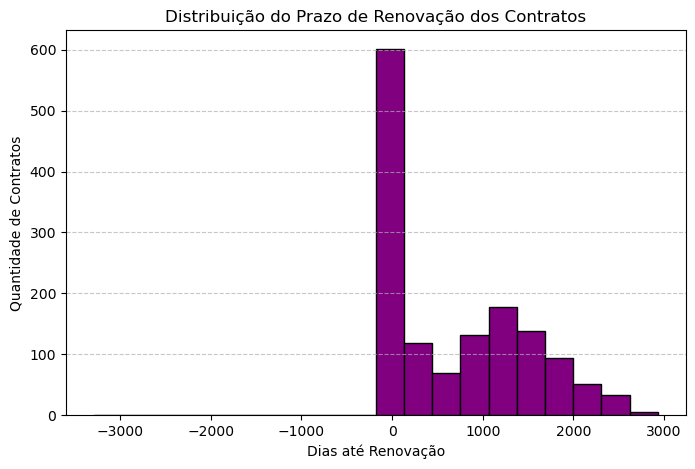

Média de dias até a renovação: 707.41
Mediana de dias até a renovação: 409.50


In [176]:
# Filtrar o DataFrame para as cidades especificadas
df_barra = df_barra = df[df['idCidade'].isin(['1654-Veloo', '1654-Itelx'])].copy()

# Calcular a coluna 'dias_ate_renovacao' no DataFrame filtrado
df_barra['dias_ate_renovacao'] = (df_barra['dataRenovacao'] - df_barra['dataAtivacao']).dt.days

# Criar histograma para visualizar distribuição de prazos de renovação
plt.figure(figsize=(8, 5))
plt.hist(df_barra['dias_ate_renovacao'].dropna(), bins=20, color='purple', edgecolor='black')
plt.xlabel('Dias até Renovação')
plt.ylabel('Quantidade de Contratos')
plt.title('Distribuição do Prazo de Renovação dos Contratos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Estatísticas sobre prazos de renovação
media_renovacao = df_barra['dias_ate_renovacao'].mean()
mediana_renovacao = df_barra['dias_ate_renovacao'].median()

print(f'Média de dias até a renovação: {media_renovacao:.2f}')
print(f'Mediana de dias até a renovação: {mediana_renovacao:.2f}')

### Marechal Deodoro

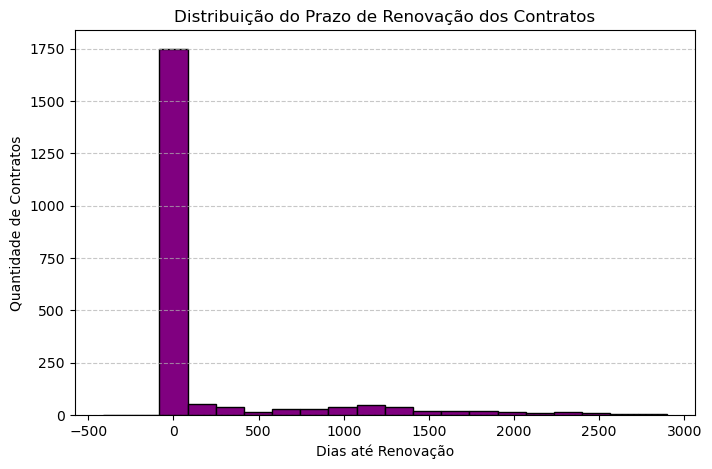

Média de dias até a renovação: 214.08
Mediana de dias até a renovação: 0.00


In [174]:
# Filtrar o DataFrame para as cidades especificadas
df_marechal = df[df['idCidade'].isin(['1699-Veloo', '1699-Itelx'])].copy()

# Calcular a coluna 'dias_ate_renovacao' no DataFrame filtrado
df_marechal['dias_ate_renovacao'] = (df_marechal['dataRenovacao'] - df_marechal['dataAtivacao']).dt.days

# Criar histograma para visualizar distribuição de prazos de renovação
plt.figure(figsize=(8, 5))
plt.hist(df_marechal['dias_ate_renovacao'].dropna(), bins=20, color='purple', edgecolor='black')
plt.xlabel('Dias até Renovação')
plt.ylabel('Quantidade de Contratos')
plt.title('Distribuição do Prazo de Renovação dos Contratos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Estatísticas sobre prazos de renovação
media_renovacao = df_marechal['dias_ate_renovacao'].mean()
mediana_renovacao = df_marechal['dias_ate_renovacao'].median()

print(f'Média de dias até a renovação: {media_renovacao:.2f}')
print(f'Mediana de dias até a renovação: {mediana_renovacao:.2f}')


## Perfil dos Clientes: 1654 - Barra de São Miguel

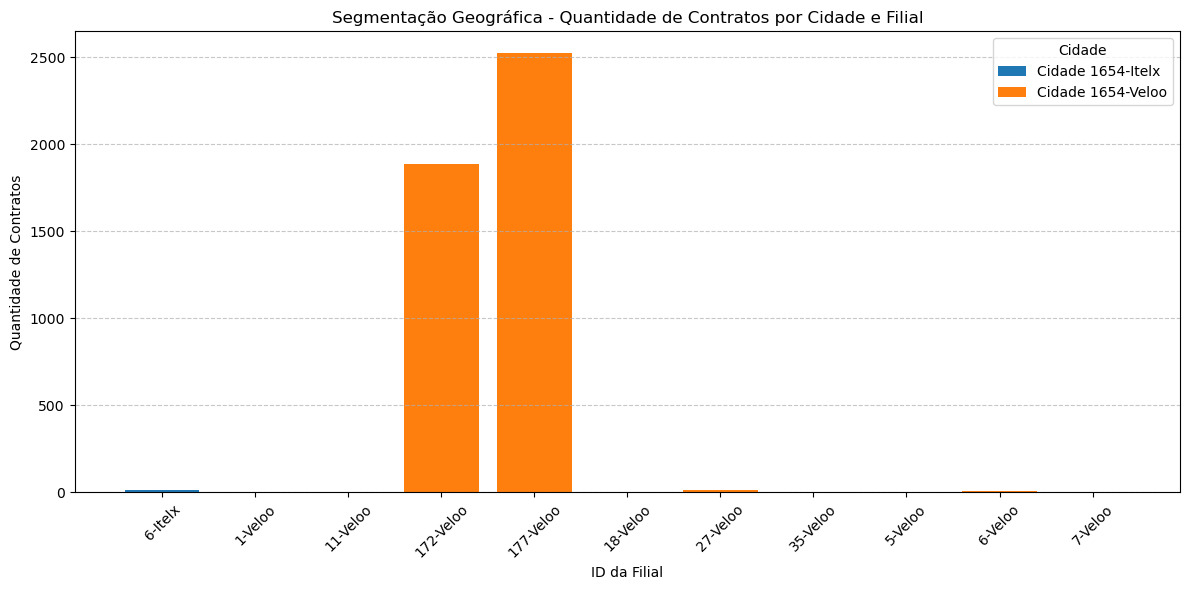

In [179]:
cidade_filial_df = df[df['idCidade'].isin(['1654-Veloo', '1654-Itelx'])]

# Agrupar os dados por cidade e filial, contando a quantidade de contratos
cidade_filial_df = cidade_filial_df.groupby(['idCidade', 'idFilial']).size().reset_index(name='quantidade_contratos')

# Criar gráfico de barras para segmentação geográfica
plt.figure(figsize=(12, 6))
for cidade in cidade_filial_df['idCidade'].unique():
    subset = cidade_filial_df[cidade_filial_df['idCidade'] == cidade]
    plt.bar(subset['idFilial'].astype(str), subset['quantidade_contratos'], label=f'Cidade {cidade}')

plt.xlabel('ID da Filial')
plt.ylabel('Quantidade de Contratos')
plt.title('Segmentação Geográfica - Quantidade de Contratos por Cidade e Filial')
plt.xticks(rotation=45)
plt.legend(title='Cidade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

## Perfil de Clientes: 1699 - Marechal Deodoro

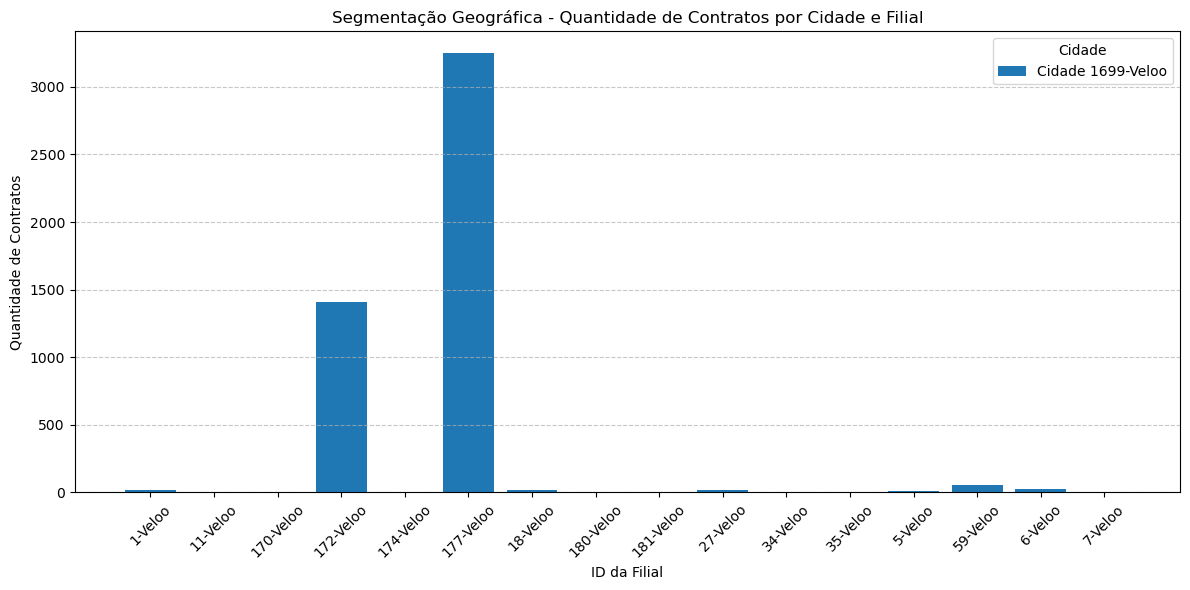

In [181]:
# Filtrar os dados para a cidade específica
cidade_filial_df = df[df['idCidade'].isin(['1699-Veloo'])]

# Agrupar os dados por cidade e filial, contando a quantidade de contratos
cidade_filial_df = cidade_filial_df.groupby(['idCidade', 'idFilial']).size().reset_index(name='quantidade_contratos')

# Criar gráfico de barras para segmentação geográfica
plt.figure(figsize=(12, 6))
for cidade in cidade_filial_df['idCidade'].unique():
    subset = cidade_filial_df[cidade_filial_df['idCidade'] == cidade]
    plt.bar(subset['idFilial'].astype(str), subset['quantidade_contratos'], label=f'Cidade {cidade}')

plt.xlabel('ID da Filial')
plt.ylabel('Quantidade de Contratos')
plt.title('Segmentação Geográfica - Quantidade de Contratos por Cidade e Filial')
plt.xticks(rotation=45)
plt.legend(title='Cidade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

## Desempenho da Equipe Comercial

Desempenho total da equipe (valor de contratos ativos): R$3,836,242.56


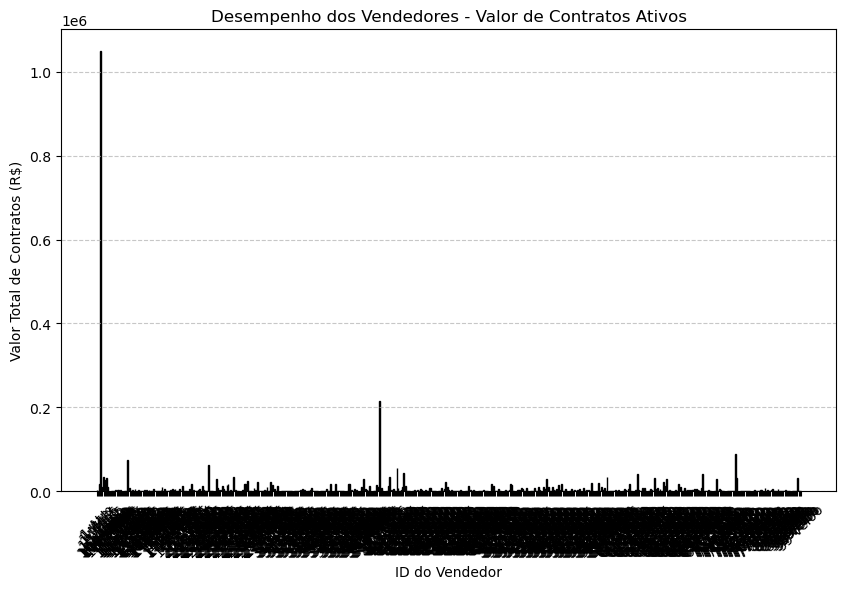

In [197]:
# Calcular o desempenho total da equipe com contratos ativos (status correto)
desempenho_total = df[df['statusContrato'] == 'A']['valorContrato'].sum()

# Exibir o desempenho total da equipe
print(f'Desempenho total da equipe (valor de contratos ativos): R${desempenho_total:,.2f}')

# Calcular o desempenho individual dos vendedores com contratos ativos
vendedores_df = df[df['statusContrato'] == 'A'].groupby('idVendedor')['valorContrato'].sum().reset_index()

# Criar gráfico de barras para desempenho dos vendedores
plt.figure(figsize=(10,6))
plt.bar(vendedores_df['idVendedor'].astype(str), vendedores_df['valorContrato'], color='blue', edgecolor='black')
plt.xlabel('ID do Vendedor')
plt.ylabel('Valor Total de Contratos (R$)')
plt.title('Desempenho dos Vendedores - Valor de Contratos Ativos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.show()



## Desempenho da Equipe Comercial - Barra de São Miguel



Desempenho total da equipe (valor de contratos ativos): R$158,965.47


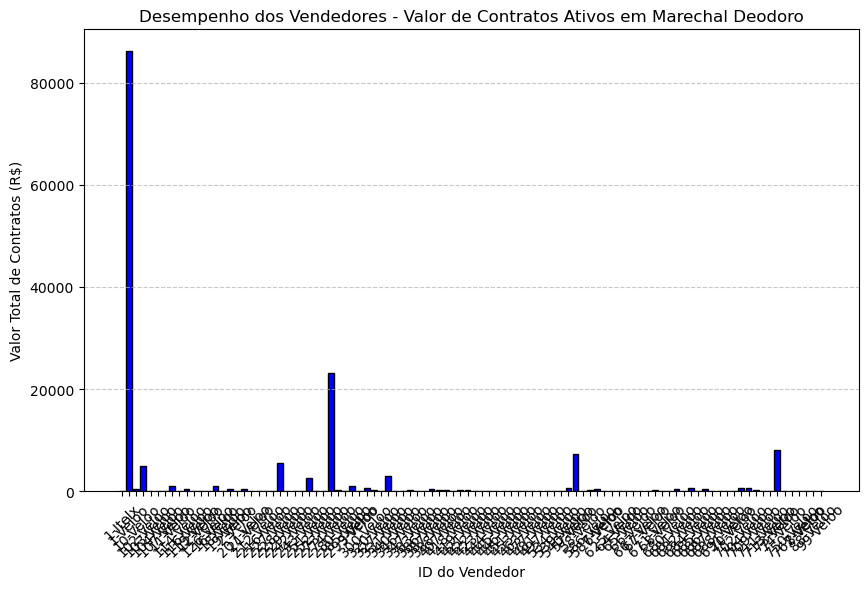

In [205]:
cidade_filial_df = df[df['idCidade'].isin(['1654-Veloo', '1654-Itelx'])]

# Calcular o desempenho total da equipe com contratos ativos (status correto)
desempenho_total = cidade_filial_df[cidade_filial_df['statusContrato'] == 'A']['valorContrato'].sum()

# Exibir o desempenho total da equipe
print(f'Desempenho total da equipe (valor de contratos ativos): R${desempenho_total:,.2f}')

# Calcular o desempenho individual dos vendedores com contratos ativos
vendedores_df = cidade_filial_df[cidade_filial_df['statusContrato'] == 'A'].groupby('idVendedor')['valorContrato'].sum().reset_index()

# Criar gráfico de barras para desempenho dos vendedores
plt.figure(figsize=(10, 6))
plt.bar(vendedores_df['idVendedor'].astype(str), vendedores_df['valorContrato'], color='blue', edgecolor='black')
plt.xlabel('ID do Vendedor')
plt.ylabel('Valor Total de Contratos (R$)')
plt.title('Desempenho dos Vendedores - Valor de Contratos Ativos em Marechal Deodoro')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.show()

## Desempenho da Equipe Comercial - Marechal Deodoro

Desempenho total da equipe (valor de contratos ativos): R$246,342.01


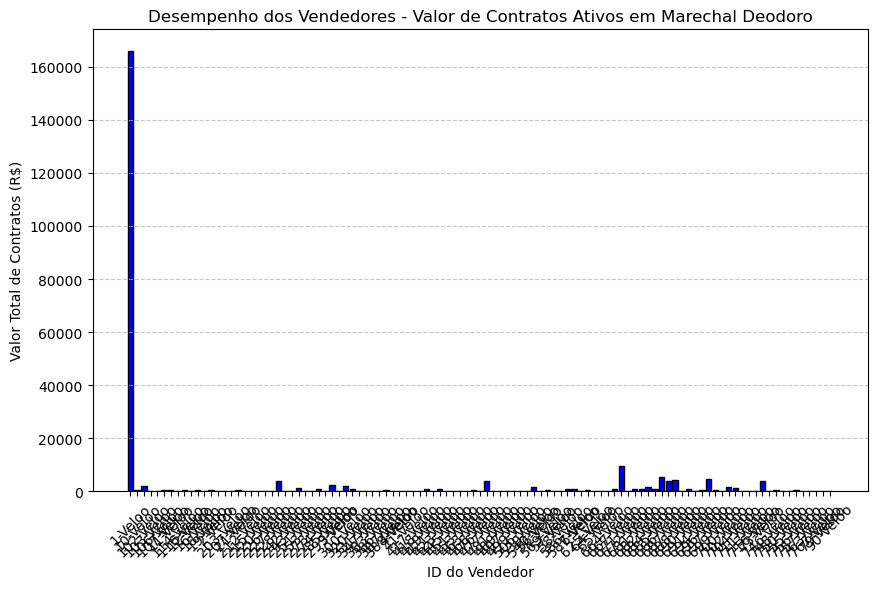

In [202]:
# Filtrar o DataFrame para a cidade específica
cidade_filial_df = df[df['idCidade'].isin(['1699-Veloo'])]

# Calcular o desempenho total da equipe com contratos ativos (status correto)
desempenho_total = cidade_filial_df[cidade_filial_df['statusContrato'] == 'A']['valorContrato'].sum()

# Exibir o desempenho total da equipe
print(f'Desempenho total da equipe (valor de contratos ativos): R${desempenho_total:,.2f}')

# Calcular o desempenho individual dos vendedores com contratos ativos
vendedores_df = cidade_filial_df[cidade_filial_df['statusContrato'] == 'A'].groupby('idVendedor')['valorContrato'].sum().reset_index()

# Criar gráfico de barras para desempenho dos vendedores
plt.figure(figsize=(10, 6))
plt.bar(vendedores_df['idVendedor'].astype(str), vendedores_df['valorContrato'], color='blue', edgecolor='black')
plt.xlabel('ID do Vendedor')
plt.ylabel('Valor Total de Contratos (R$)')
plt.title('Desempenho dos Vendedores - Valor de Contratos Ativos em Marechal Deodoro')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.show()


## Análise do Status do Contrato por Cidade - 1654: Barra de São Miguel

Percentual de contratos por cidade e status:
statusContrato          A         D          I         P
idCidade                                                
1654-Itelx      92.857143  0.000000   7.142857  0.000000
1654-Veloo      57.802297  0.292727  41.657284  0.247692


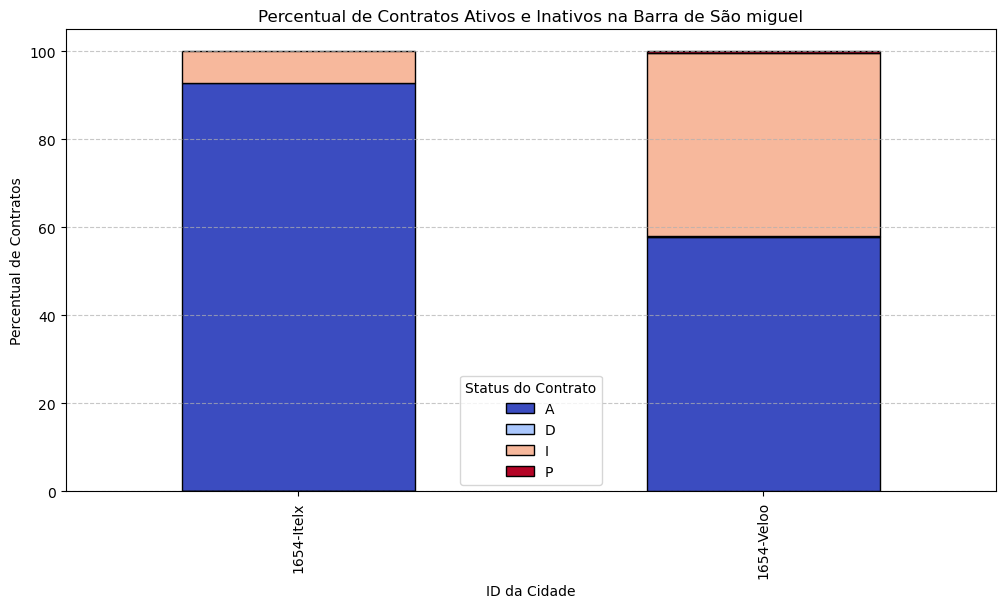

In [213]:
# Análise do status do contrato por cidade
status_cidade_df = df[df['idCidade'].isin(['1654-Veloo', '1654-Itelx'])].groupby(['idCidade', 'statusContrato']).size().unstack(fill_value=0)
status_cidade_df = status_cidade_df.div(status_cidade_df.sum(axis=1), axis=0) * 100  # Converter para percentual

# Exibir valores calculados
print("Percentual de contratos por cidade e status:")
print(status_cidade_df)

# Criar gráfico de barras empilhadas para percentual de contratos ativos e inativos nas cidades 1654-Veloo e 1654-Itelx
status_cidade_df.plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm', edgecolor='black')
plt.xlabel('ID da Cidade')
plt.ylabel('Percentual de Contratos')
plt.title('Percentual de Contratos Ativos e Inativos na Barra de São miguel')
plt.legend(title='Status do Contrato')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Análise do Status do Contrato por Cidade - 1699: Marechal Deodoro

Percentual de contratos por cidade e status:
statusContrato          A         D          I         P
idCidade                                                
1699-Veloo      63.308458  0.746269  34.991708  0.953566


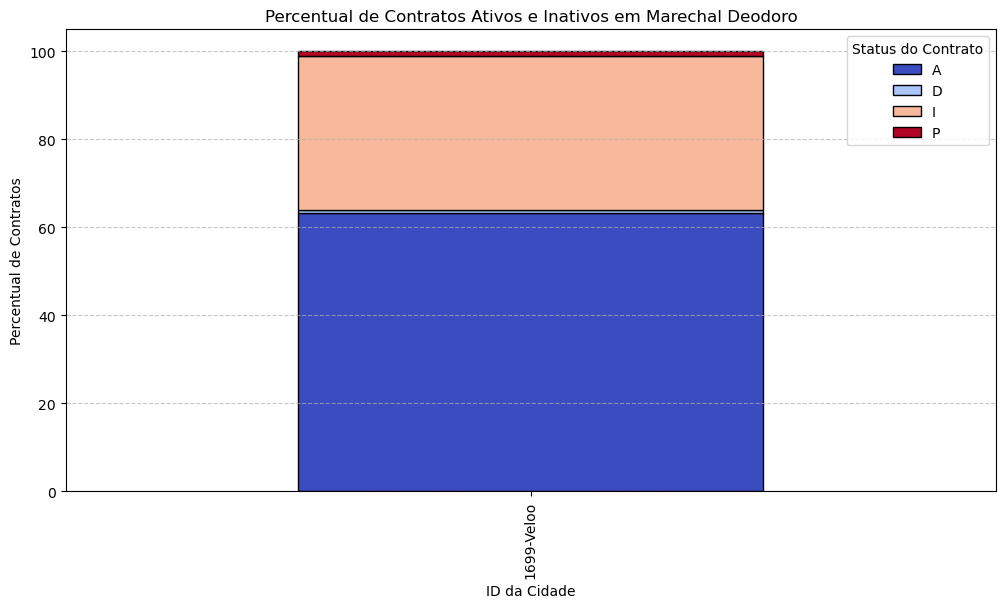

In [215]:
# Análise do status do contrato por cidade
status_cidade_df = df[df['idCidade'].isin(['1699-Veloo'])].groupby(['idCidade', 'statusContrato']).size().unstack(fill_value=0)
status_cidade_df = status_cidade_df.div(status_cidade_df.sum(axis=1), axis=0) * 100  # Converter para percentual

# Exibir valores calculados
print("Percentual de contratos por cidade e status:")
print(status_cidade_df)

# Criar gráfico de barras empilhadas para percentual de contratos ativos e inativos nas cidades 1654-Veloo e 1654-Itelx
status_cidade_df.plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm', edgecolor='black')
plt.xlabel('ID da Cidade')
plt.ylabel('Percentual de Contratos')
plt.title('Percentual de Contratos Ativos e Inativos em Marechal Deodoro')
plt.legend(title='Status do Contrato')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Ditribuição dos Tipos de Contratos

### Barra de São Miguel

Top 10 Tipos de Contrato mais Frequentes:
idTipoContrato
25-Veloo    1
16-Itelx    1
9-Itelx     1
72-Veloo    1
67-Veloo    1
66-Veloo    1
6-Itelx     1
5-Itelx     1
46-Veloo    1
23-Itelx    1
Name: count, dtype: int64


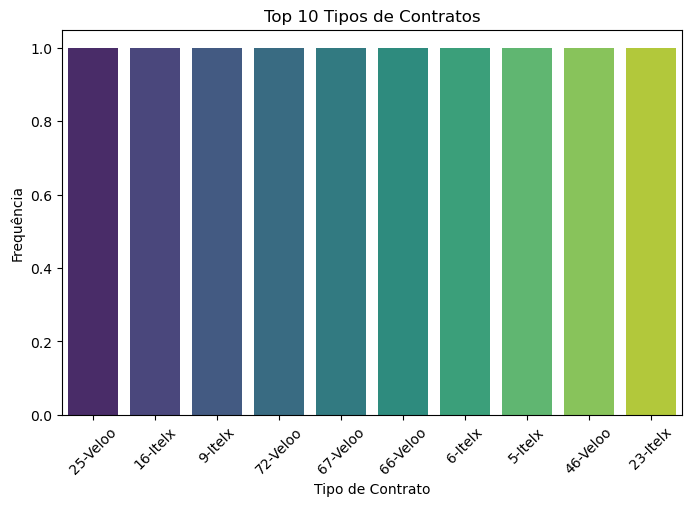

Total de contratos nas cidades Barra de São Miguel e Itelx: 29


In [240]:
data = {
    'idTipoContrato': ['25-Veloo', '5-Veloo', '15-Veloo', '30-Veloo', '70-Veloo', '71-Veloo', '10-Veloo', '20-Veloo', 
                       '69-Veloo', '39-Veloo', '34-Veloo', '35-Veloo', '36-Veloo', '11-Itelx', '12-Itelx', '16-Itelx',
                       '16-Veloo', '1-Veloo', '20-Itelx', '22-Itelx', '23-Itelx', '46-Veloo', '5-Itelx', '6-Itelx',
                       '66-Veloo', '67-Veloo', '72-Veloo', '9-Itelx', '7-Itelx'],
    'idCidade': ['1654-Veloo', '1654-Veloo', '1654-Veloo', '1654-Veloo', '1654-Veloo', '1654-Veloo', '1654-Veloo', '1654-Veloo',
                 '1654-Veloo', '1654-Veloo', '1654-Veloo', '1654-Veloo', '1654-Veloo', '1654-Itelx', '1654-Itelx', '1654-Itelx',
                 '1654-Itelx', '1654-Itelx', '1654-Itelx', '1654-Itelx', '1654-Itelx', '1654-Itelx', '1654-Itelx', '1654-Itelx',
                 '1654-Itelx', '1654-Itelx', '1654-Itelx', '1654-Itelx', '1654-Itelx']
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Filtrando para as cidades de Barra de São Miguel
df_barra = df[df['idCidade'].isin(['1654-Veloo', '1654-Itelx'])]

# Contagem dos tipos de contrato
contrato_counts = df_barra['idTipoContrato'].value_counts()

# Exibindo o top 10 dos tipos de contrato
top_10_contratos = contrato_counts.head(10)
print("Top 10 Tipos de Contrato mais Frequentes:")
print(top_10_contratos)

# Criando o gráfico para os tipos de contrato
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x=top_10_contratos.index, y=top_10_contratos.values, hue=top_10_contratos.index, palette='viridis', legend=False)
plt.xlabel('Tipo de Contrato')
plt.ylabel('Frequência')
plt.title('Top 10 Tipos de Contratos')
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.show()

# Exibindo a quantidade total de contratos
total_contratos = df_barra.shape[0]
print(f'Total de contratos nas cidades Barra de São Miguel e Itelx: {total_contratos}')


### Marechal Deodoro

Top 10 Tipos de Contratos mais Frequentes:
idTipoContrato
10-Veloo    1
48-Veloo    1
6-Veloo     1
69-Veloo    1
67-Veloo    1
66-Veloo    1
65-Veloo    1
5-Veloo     1
52-Veloo    1
46-Veloo    1
Name: count, dtype: int64


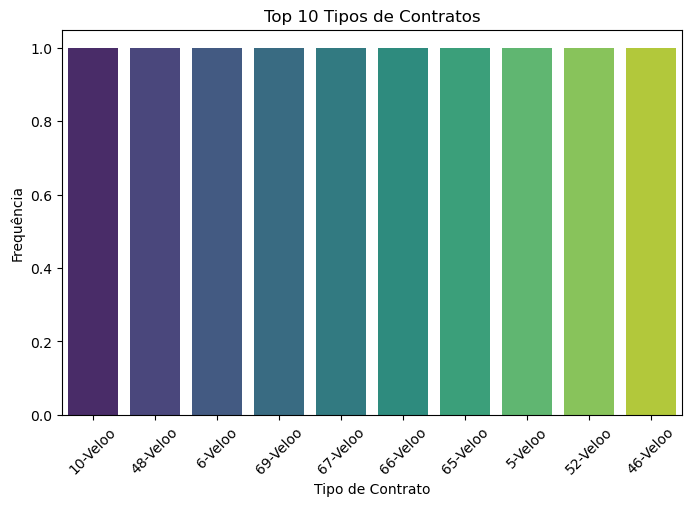

Total de contratos nas cidades Barra de São Miguel e Itelx: 19


In [243]:
data = {
    'idTipoContrato': ['10-Veloo', '15-Veloo', '16-Veloo', '1-Veloo', '20-Veloo', '25-Veloo', '26-Veloo', '30-Veloo', 
                       '37-Veloo', '46-Veloo', '48-Veloo', '52-Veloo', '5-Veloo', '65-Veloo', '66-Veloo', '67-Veloo',
                       '69-Veloo', '6-Veloo', '72-Veloo'],
                      
    'idCidade': ['1699-Veloo']*19
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Filtrando para as cidades de Barra de São Miguel ('1654-Veloo') e Itelx ('1654-Itelx')
df_barra = df[df['idCidade'].isin(['1699-Veloo'])]

# Contagem dos tipos de contrato
contrato_counts = df_barra['idTipoContrato'].value_counts()

# Exibindo o top 10 dos tipos de contrato
top_10_contratos = contrato_counts.head(10)
print("Top 10 Tipos de Contratos mais Frequentes:")
print(top_10_contratos)

# Criando o gráfico para os tipos de contrato
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x=top_10_contratos.index, y=top_10_contratos.values, hue=top_10_contratos.index, palette='viridis', legend=False)
plt.xlabel('Tipo de Contrato')
plt.ylabel('Frequência')
plt.title('Top 10 Tipos de Contratos')
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.show()

# Exibindo a quantidade total de contratos
total_contratos = df_barra.shape[0]
print(f'Total de contratos nas cidades Barra de São Miguel e Itelx: {total_contratos}')


## Percentual da Data do Vencimento de Contrato

### Marechal Deodoro


Top 10 Vencimentos com Maior Porcentagem:
idVencimento
0     3.225806
1     3.225806
10    3.225806
11    3.225806
12    3.225806
13    3.225806
14    3.225806
15    3.225806
16    3.225806
17    3.225806
Name: count, dtype: float64


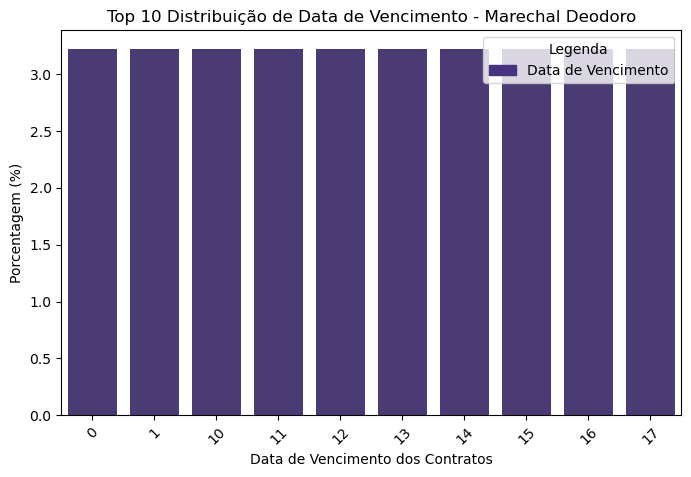

In [259]:
data = {
    'idVencimento': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
                     '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                     '21', '22', '23', '24', '25', '26', '27', '28', '29', '30'],
    'idCidade': ['1669-Veloo'] * 31
}

df = pd.DataFrame(data)

# Filtrando para a cidade correta
df_barra = df[df['idCidade'] == '1669-Veloo']  

# Contagem dos tipos de vencimento
contrato_counts = df_barra['idVencimento'].value_counts().sort_index()

# Calculando as porcentagens
total = contrato_counts.sum()
contrato_percentages = (contrato_counts / total) * 100

# Selecionando os 10 maiores percentuais
top_10_percentages = contrato_percentages.nlargest(10)

# Exibindo os 10 maiores percentuais
print("\nTop 10 Vencimentos com Maior Porcentagem:")
print(top_10_percentages)

# Criando o gráfico
plt.figure(figsize=(8, 5))

# Definindo a cor diretamente
viridis_color = sns.color_palette('viridis')[0]
bar_plot = sns.barplot(x=top_10_percentages.index, y=top_10_percentages.values, color=viridis_color)

plt.xlabel('Data de Vencimento dos Contratos')
plt.ylabel('Porcentagem (%)')
plt.title('Top 10 Distribuição de Data de Vencimento - Marechal Deodoro')
plt.xticks(rotation=45)

# Criando a legenda
handles = [plt.Rectangle((0, 0), 1, 1, color=viridis_color)]
plt.legend(handles, ['Data de Vencimento'], title="Legenda")

# Exibindo o gráfico
plt.show()


### Barra de São Miguel

## Descrição de Plano

In [283]:
print(len(data['descricaoPlano']))
print(len(data['idCidade']))

55
50


### Marechal Deodoro

Cálculo do Percentual para cada plano:
descricaoPlano
ISP                                                           1.818182
LIG 5 MB NOVO                                                 1.818182
PACOTE FAMILIA 30MB + TV                                      1.818182
50MB_SITIO_B01                                                1.818182
LAC___10G___AIR___RGO___ACESSO10                              1.818182
BANDA_LARGA___20M_109,99                                      1.818182
VPNIP___10M___SWS___POLICIA_RODOVIARIA_FEDERAL                1.818182
CDNBGP___2G___CRU___NETCELL                                   1.818182
BU09 - INTERNET RESIDENCIAL 300MB                             1.818182
BANDA_LARGA___15M_PREF._UNIAO_110,00                          1.818182
50 MEGAS PROMOCIONAL                                          1.818182
LIG_ULTRA_300MB                                               1.818182
LIG FIBRA 30MB NF                                             1.818182
LIG FIBRA 50MB NF      

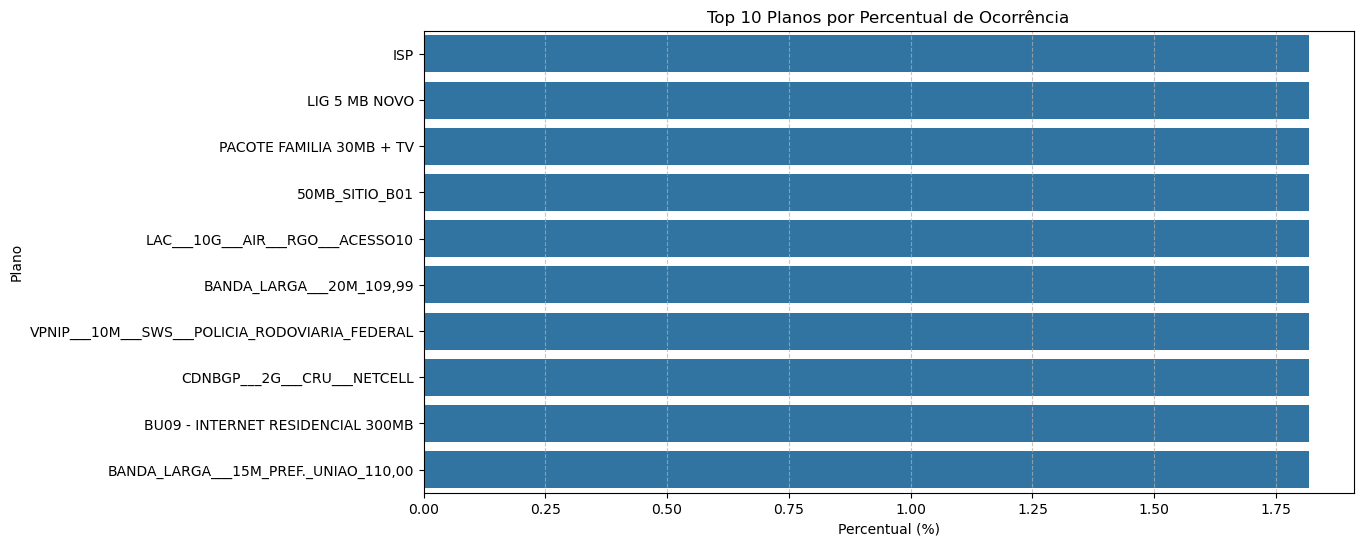

In [289]:
data = {
    'descricaoPlano': [
        'ISP', 'PREF._RIO_LARGO___SEC_DE_EDUCACAO', 'PACOTE FULL 100MB + TV', 'VPN___10M___SMTT___AV_MELO_MORAES', 
        'CDNBGP___500M___AIR___UP_SOLUCÕES_SEDE_1', 'FAMILIA(MIGRACAO)___BANDA_LARGA/30M', 'PREF._RIO_LARGO___CAF', 
        '300MB_SPEEDY_B01', 'CDNBGP___1.5G___MCO___CONNECTI', '200MB_SPEEDY', 'BANDA_LARGA___5M_49,99', 
        'SIMPLES___BANDA_LARGA/15M_69,99', 'DEFAULT', 'DIPBGP___2.5G___BTH___WG_INTERNET', 
        'IP_DEDICADO___10M___SNH_____SEC_FIN', 'BANDA_LARGA___15M_GPON_79,99', 'LAC___30M___MCO___SLQ___TRT_2', 
        'START', 'BANDA_LARGA___120M_GPON____235,99', 'FULL', 'DIPPON___50M___BDG___VILLAGE_BARRA_HOTEL', 
        'DIPPON___50M___MCO___WEBFAST_TELECOM', '200MB_SPEEDY_B01', 'GOV', 'DIPPON___30M___MHD___PREF_MAL_DEODORO___FINANCAS', 
        'BANDA_LARGA___60M___149,99', 'BASIC___BANDA_LARGA/10M', 'ULTRA___BANDA_LARGA/50M', 
        'DIPPON___250M___MCO___EVENTO_REAJA_ALAGOAS___RODRIGO_CUNHA', 'FULL___BANDA_LARGA/100M', 'PACOTE FAMILIA 30MB + TV', 
        '50MB_SITIO_B01', 'LAC___10G___AIR___RGO___ACESSO10', 'BANDA_LARGA___20M_109,99', 
        'VPNIP___10M___SWS___POLICIA_RODOVIARIA_FEDERAL', 'CDNBGP___2G___CRU___NETCELL', 'BU09 - INTERNET RESIDENCIAL 300MB', 
        'BANDA_LARGA___15M_PREF._UNIAO_110,00', '50 MEGAS PROMOCIONAL', 'LIG_ULTRA_300MB', 'LIG FIBRA 30MB NF', 'LIG 5 MB NOVO', 
        'LIG FIBRA 50MB NF', 'PLANO BASIC', 'PREMIERE - 20MB - AAD', '200MB_ACS_B02', 'MACEIÓ - 5M', '300MB_MACEIONET_NC', 
        '300MB_MIX', '200MB_MIX_B07', 'IP FIXO - VAREJO', 'TV BASICA', '70MB_MIX', '200M GCP BU07', '500MB_ACS_B02'
    ],  
    'idCidade': ['1699-Veloo'] * 55
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Filtrando por idCidade
df_barra = df[df['idCidade'] == '1699-Veloo']

# Contar os contratos por plano e calcular o percentual
contagem_planos = df_barra['descricaoPlano'].value_counts(normalize=True) * 100

# Exibindo o cálculo do percentual
print("Cálculo do Percentual para cada plano:")
print(contagem_planos)

# Filtrar os planos com maior percentual (top 10, por exemplo)
top_planos = contagem_planos.nlargest(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_planos.values, y=top_planos.index)
plt.xlabel('Percentual (%)')
plt.ylabel('Plano')
plt.title('Top 10 Planos por Percentual de Ocorrência')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



Top 10 Planos com Maior Percentual:
descricaoPlano
ISP                                               1.818182
LIG 5 MB NOVO                                     1.818182
PACOTE FAMILIA 30MB + TV                          1.818182
50MB_SITIO_B01                                    1.818182
LAC___10G___AIR___RGO___ACESSO10                  1.818182
BANDA_LARGA___20M_109,99                          1.818182
VPNIP___10M___SWS___POLICIA_RODOVIARIA_FEDERAL    1.818182
CDNBGP___2G___CRU___NETCELL                       1.818182
BU09 - INTERNET RESIDENCIAL 300MB                 1.818182
BANDA_LARGA___15M_PREF._UNIAO_110,00              1.818182
Name: proportion, dtype: float64


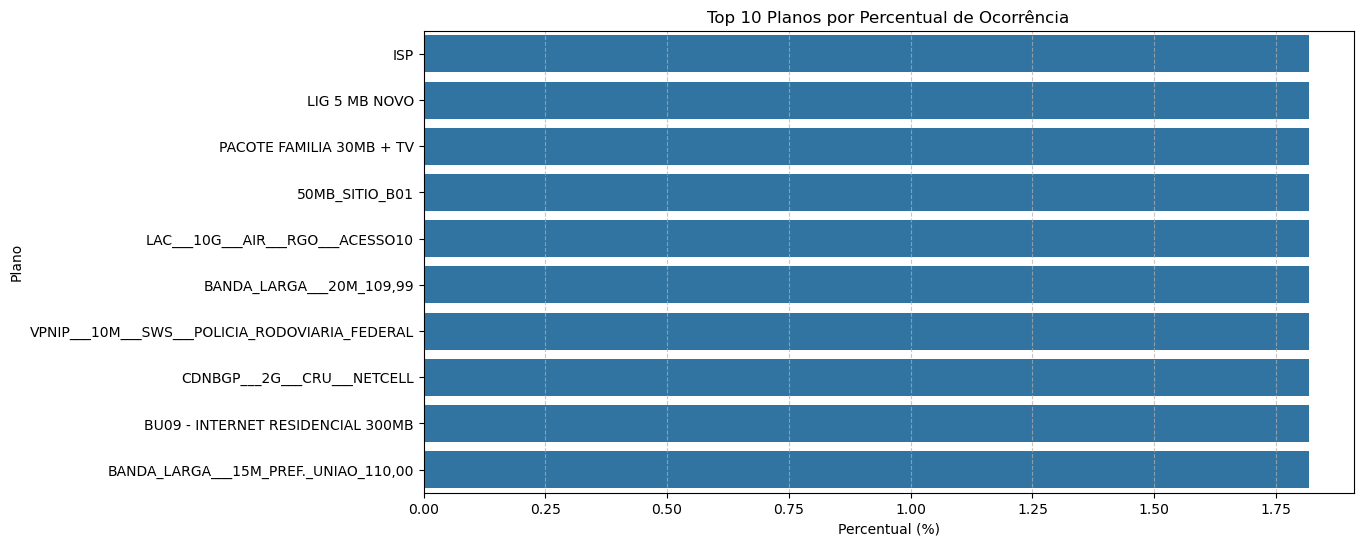

In [296]:
data = {
    'descricaoPlano': [
        'ISP', 'PREF._RIO_LARGO___SEC_DE_EDUCACAO', 'PACOTE FULL 100MB + TV', 'VPN___10M___SMTT___AV_MELO_MORAES', 
        'CDNBGP___500M___AIR___UP_SOLUCÕES_SEDE_1', 'FAMILIA(MIGRACAO)___BANDA_LARGA/30M', 'PREF._RIO_LARGO___CAF', 
        '300MB_SPEEDY_B01', 'CDNBGP___1.5G___MCO___CONNECTI', '200MB_SPEEDY', 'BANDA_LARGA___5M_49,99', 
        'SIMPLES___BANDA_LARGA/15M_69,99', 'DEFAULT', 'DIPBGP___2.5G___BTH___WG_INTERNET', 
        'IP_DEDICADO___10M___SNH_____SEC_FIN', 'BANDA_LARGA___15M_GPON_79,99', 'LAC___30M___MCO___SLQ___TRT_2', 
        'START', 'BANDA_LARGA___120M_GPON____235,99', 'FULL', 'DIPPON___50M___BDG___VILLAGE_BARRA_HOTEL', 
        'DIPPON___50M___MCO___WEBFAST_TELECOM', '200MB_SPEEDY_B01', 'GOV', 'DIPPON___30M___MHD___PREF_MAL_DEODORO___FINANCAS', 
        'BANDA_LARGA___60M___149,99', 'BASIC___BANDA_LARGA/10M', 'ULTRA___BANDA_LARGA/50M', 
        'DIPPON___250M___MCO___EVENTO_REAJA_ALAGOAS___RODRIGO_CUNHA', 'FULL___BANDA_LARGA/100M', 'PACOTE FAMILIA 30MB + TV', 
        '50MB_SITIO_B01', 'LAC___10G___AIR___RGO___ACESSO10', 'BANDA_LARGA___20M_109,99', 
        'VPNIP___10M___SWS___POLICIA_RODOVIARIA_FEDERAL', 'CDNBGP___2G___CRU___NETCELL', 'BU09 - INTERNET RESIDENCIAL 300MB', 
        'BANDA_LARGA___15M_PREF._UNIAO_110,00', '50 MEGAS PROMOCIONAL', 'LIG_ULTRA_300MB', 'LIG FIBRA 30MB NF', 'LIG 5 MB NOVO', 
        'LIG FIBRA 50MB NF', 'PLANO BASIC', 'PREMIERE - 20MB - AAD', '200MB_ACS_B02', 'MACEIÓ - 5M', '300MB_MACEIONET_NC', 
        '300MB_MIX', '200MB_MIX_B07', 'IP FIXO - VAREJO', 'TV BASICA', '70MB_MIX', '200M GCP BU07', '500MB_ACS_B02'
    ],  
    'idCidade': ['1699-Veloo'] * 55
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Filtrando por idCidade
df_barra = df[df['idCidade'] == '1699-Veloo']

# Contar os contratos por plano e calcular o percentual
contagem_planos = df_barra['descricaoPlano'].value_counts(normalize=True) * 100

# Filtrar os planos com maior percentual (top 10, por exemplo)
top_planos = contagem_planos.nlargest(10)

# Exibindo os Top 10 planos
print("\nTop 10 Planos com Maior Percentual:")
print(top_planos)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_planos.values, y=top_planos.index)
plt.xlabel('Percentual (%)')
plt.ylabel('Plano')
plt.title('Top 10 Planos por Percentual de Ocorrência')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
